# Libraries

Importing necessary libraries for the project

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
import geopandas as gpd
import folium
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
import requests
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from wordcloud import WordCloud, STOPWORDS
import graphviz
from sklearn.tree import export_graphviz
import plotly.express as px

# Data Cleaning

In [3]:
df = pd.read_csv("mental-heath-in-tech-2016_20161114.csv")
df

Are you self-employed?  \
0                          0   
1                          0   
2                          0   
3                          1   
4                          0   
...                      ...   
1428                       1   
1429                       1   
1430                       0   
1431                       0   
1432                       0   

     How many employees does your company or organization have?  \
0                                                26-100           
1                                                  6-25           
2                                                  6-25           
3                                                   NaN           
4                                                  6-25           
...                                                 ...           
1428                                                NaN           
1429                                                NaN           
1430                                            100-500           
1431                                            100-500           
1432                                            100-500           

      Is your employer primarily a tech company/organization?  \
0                                                   1.0         
1                                                   1.0         
2                                                   1.0         
3                                                   NaN         
4                                                   0.0         
...                                                 ...         
1428                                                NaN         
1429                                                NaN         
1430                                                1.0         
1431                                                0.0         
1432                                                1.0         

      Is your primary role within your company related to tech/IT?  \
0                                                   NaN              
1                                                   NaN              
2                                                   NaN              
3                                                   NaN              
4                                                   1.0              
...                                                 ...              
1428                                                NaN              
1429                                                NaN              
1430                                                NaN              
1431                                                1.0              
1432                                                NaN              

     Does your employer provide mental health benefits as part of healthcare coverage?  \
0                       Not eligible for coverage / N/A                                  
1                                                    No                                  
2                                                    No                                  
3                                                   NaN                                  
4                                                   Yes                                  
...                                                 ...                                  
1428                                                NaN                                  
1429                                                NaN                                  
1430                                                Yes                                  
1431                                       I don't know                                  
1432                                                Yes                                  

     Do you know the options for mental health care available under your employer-provided coverage?  \
0        

In [18]:
df.isnull().sum() 


Are you self-employed?                                                                  0
How many employees does your company or organization have?                            287
Is your employer primarily a tech company/organization?                               287
Is your primary role within your company related to tech/IT?                         1170
Does your employer provide mental health benefits as part of healthcare coverage?     287
                                                                                     ... 
What US state or territory do you live in?                                            593
What country do you work in?                                                            0
What US state or territory do you work in?                                            582
Which of the following best describes your work position?                               0
Do you work remotely?                                                                   0
Length: 63

In [19]:
df.duplicated().sum()

0

In [20]:
df.columns.to_list()

['Are you self-employed?',
 'How many employees does your company or organization have?',
 'Is your employer primarily a tech company/organization?',
 'Is your primary role within your company related to tech/IT?',
 'Does your employer provide mental health benefits as part of healthcare coverage?',
 'Do you know the options for mental health care available under your employer-provided coverage?',
 'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
 'Does your employer offer resources to learn more about mental health concerns and options for seeking help?',
 'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
 'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:',
 'Do you think that discussing a mental health disorder with your employer would have neg

In [21]:
columns_to_drop = [
    'Is your primary role within your company related to tech/IT?',
    'Do you have medical coverage (private insurance or state-provided) which includes treatment of \xa0mental health issues?',
    'Do you know local or online resources to seek help for a mental health disorder?', 
    "If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?", 
    "If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?", 
    "If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?", 
    "If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?", 
    "Do you believe your productivity is ever affected by a mental health issue?",
    "If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?",
    "Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?",
    "Do you know the options for mental health care available under your employer-provided coverage?"
]

df.drop(columns=columns_to_drop, inplace=True)


print(df.head())

   Are you self-employed?  \
0                       0   
1                       0   
2                       0   
3                       1   
4                       0   

  How many employees does your company or organization have?  \
0                                             26-100           
1                                               6-25           
2                                               6-25           
3                                                NaN           
4                                               6-25           

   Is your employer primarily a tech company/organization?  \
0                                                1.0         
1                                                1.0         
2                                                1.0         
3                                                NaN         
4                                                0.0         

  Does your employer provide mental health benefits as part of heal

In [22]:
df.dropna(subset=["Does your employer provide mental health benefits as part of healthcare coverage?", "Have your previous employers provided mental health benefits?"], inplace= True)
df

Are you self-employed?  \
0                          0   
1                          0   
2                          0   
4                          0   
5                          0   
...                      ...   
1425                       0   
1426                       0   
1427                       0   
1430                       0   
1431                       0   

     How many employees does your company or organization have?  \
0                                                26-100           
1                                                  6-25           
2                                                  6-25           
4                                                  6-25           
5                                        More than 1000           
...                                                 ...           
1425                                            100-500           
1426                                            100-500           
1427                                           500-1000           
1430                                            100-500           
1431                                            100-500           

      Is your employer primarily a tech company/organization?  \
0                                                   1.0         
1                                                   1.0         
2                                                   1.0         
4                                                   0.0         
5                                                   1.0         
...                                                 ...         
1425                                                1.0         
1426                                                1.0         
1427                                                1.0         
1430                                                1.0         
1431                                                0.0         

     Does your employer provide mental health benefits as part of healthcare coverage?  \
0                       Not eligible for coverage / N/A                                  
1                                                    No                                  
2                                                    No                                  
4                                                   Yes                                  
5                                                   Yes                                  
...                                                 ...                                  
1425                                                Yes                                  
1426                                       I don't know                                  
1427                                                Yes                                  
1430                                                Yes                                  
1431                                       I don't know                                  

     Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?  \
0                                                    No                                                                                       
1                                                   Yes                                                                                       
2                                                    No                                                                                       
4                                                    No                                                                                       
5                                                    No                                                                                       
...                                                 ...                                         

In [23]:
df.isnull().sum()

Are you self-employed?                                                                                                                              0
How many employees does your company or organization have?                                                                                          0
Is your employer primarily a tech company/organization?                                                                                             0
Does your employer provide mental health benefits as part of healthcare coverage?                                                                   0
Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?              0
Does your employer offer resources to learn more about mental health concerns and options for seeking help?                                         0
Is your anonymity protected if you choose to take advantage of mental health or substance abuse trea

In [4]:
not_applicable_columns = ["What US state or territory do you work in?", "What US state or territory do you live in?", "Why or why not?", "Why or why not?.1", "If yes, what condition(s) have you been diagnosed with?", "If maybe, what condition(s) do you believe you have?","If so, what condition(s) were you diagnosed with?"]


df[not_applicable_columns] = df[not_applicable_columns].replace({None: "Not Applicable"}) #replacing missing values with Not Applicable
df.isnull().sum()

Are you self-employed?                                                                  0
How many employees does your company or organization have?                            287
Is your employer primarily a tech company/organization?                               287
Is your primary role within your company related to tech/IT?                         1170
Does your employer provide mental health benefits as part of healthcare coverage?     287
                                                                                     ... 
What US state or territory do you live in?                                              0
What country do you work in?                                                            0
What US state or territory do you work in?                                              0
Which of the following best describes your work position?                               0
Do you work remotely?                                                                   0
Length: 63

In [ ]:
df["What is your gender?"].unique() #checking for unique values

In [25]:
def map_gender(gender):
    if pd.isnull(gender):
        return np.nan  # Keep NaN as NaN
    gender = gender.strip().lower()  # Clean spaces and lowercase
    if gender in ['male', 'm', 'man', 'male.', 'cis male', 'male (cis)', 'cisgender male', 'cisdude', 'cis man']:
        return 'Male'
    elif gender in ['female', 'f', 'woman', 'female.', 'cis female', 'cis-woman', 'female/woman', 'female assigned at birth', 'i identify as female.']:
        return 'Female'
    else:
        return 'Other'

# Apply the function to the gender column
df['What is your gender?'] = df['What is your gender?'].apply(map_gender)

# Check the result
df['What is your gender?'].value_counts()

What is your gender?
Male      744
Female    238
Other      30
Name: count, dtype: int64

In [26]:
df["What is your gender?"].replace({None:"Other"}, inplace=True) 
df["What is your gender?"].isnull().sum()

C:\Users\filip\AppData\Local\Temp\ipykernel_10156\403635513.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["What is your gender?"].replace({None:"Other"}, inplace=True)


0

In [27]:
df.isnull().sum()

Are you self-employed?                                                                                                                             0
How many employees does your company or organization have?                                                                                         0
Is your employer primarily a tech company/organization?                                                                                            0
Does your employer provide mental health benefits as part of healthcare coverage?                                                                  0
Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?             0
Does your employer offer resources to learn more about mental health concerns and options for seeking help?                                        0
Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment 

In [13]:
df.dropna(subset=["Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?"], inplace=True)

df.isnull().sum()

Are you self-employed?                                                                                                                            0
How many employees does your company or organization have?                                                                                        0
Is your employer primarily a tech company/organization?                                                                                           0
Does your employer provide mental health benefits as part of healthcare coverage?                                                                 0
Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?            0
Does your employer offer resources to learn more about mental health concerns and options for seeking help?                                       0
Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resour

In [14]:
df.shape

(976, 52)

In [ ]:
df = df.drop("Are you self-employed?", axis=1)
df

In [ ]:
df = df.drop("Do you have previous employers?", axis=1)
df

In [5]:
df.to_csv("Cleaned MentalHealth_def.csv") #saving the cleaned df to work with it directly, useful for cross working

# Data Visualization

In [5]:
df = pd.read_csv("Cleaned MentalHealth_def.csv")
df

Unnamed: 0 How many employees does your company or organization have?  \
0             0                                             26-100           
1             1                                               6-25           
2             2                                               6-25           
3             4                                               6-25           
4             5                                     More than 1000           
..          ...                                                ...           
971        1425                                            100-500           
972        1426                                            100-500           
973        1427                                           500-1000           
974        1430                                            100-500           
975        1431                                            100-500           

     Is your employer primarily a tech company/organization?  \
0                                                  1.0         
1                                                  1.0         
2                                                  1.0         
3                                                  0.0         
4                                                  1.0         
..                                                 ...         
971                                                1.0         
972                                                1.0         
973                                                1.0         
974                                                1.0         
975                                                0.0         

    Does your employer provide mental health benefits as part of healthcare coverage?  \
0                      Not eligible for coverage / N/A                                  
1                                                   No                                  
2                                                   No                                  
3                                                  Yes                                  
4                                                  Yes                                  
..                                                 ...                                  
971                                                Yes                                  
972                                       I don't know                                  
973                                                Yes                                  
974                                                Yes                                  
975                                       I don't know                                  

    Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?  \
0                                                   No                                                                                       
1                                                  Yes                                                                                       
2                                                   No                                                                                       
3                                                   No                                                                                       
4                                                   No                                                                                       
..                                                 ...                                                                                       
971                                                Yes                                                                                       
972                                                 No                                        

In [4]:
df["Do you currently have a mental health disorder?"].value_counts()

Do you currently have a mental health disorder?
Yes      396
No       360
Maybe    220
Name: count, dtype: int64

In [6]:
df["What is your age?"].replace({323:32, 3:30, 99:30}, inplace=True)
df["What is your age?"].value_counts()


C:\Users\filip\AppData\Local\Temp\ipykernel_12868\2988186802.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["What is your age?"].replace({323:32, 3:30, 99:30}, inplace=True)


What is your age?
30    68
31    57
32    56
28    55
29    54
33    52
35    51
26    51
27    48
34    48
36    43
37    41
39    40
38    34
40    27
24    23
25    21
44    21
45    21
43    19
41    19
42    17
22    17
46    14
23    12
47    11
21     9
49     6
52     6
51     4
48     4
50     4
55     3
57     3
63     2
53     2
19     2
54     2
17     1
61     1
58     1
66     1
59     1
20     1
74     1
70     1
56     1
Name: count, dtype: int64

Cell used for plotting different colors and plots for both the presentation and the report. It has been used as a "template", so will not tell that much about the analysis, useful for the own work.

In [40]:
fig = px.histogram(df, 
                   x="What is your age?", 
                   color_discrete_sequence=["#3a6367"], 
                   opacity=0.7)  
# Make the background transparent and update layout
fig.update_layout(
    paper_bgcolor='rgba(0,0,0,0)',  
    plot_bgcolor='rgba(0,0,0,0)',   
    xaxis_title="What is your age?",  
    height=600,
    width=800
)

fig.show()

### Histplots

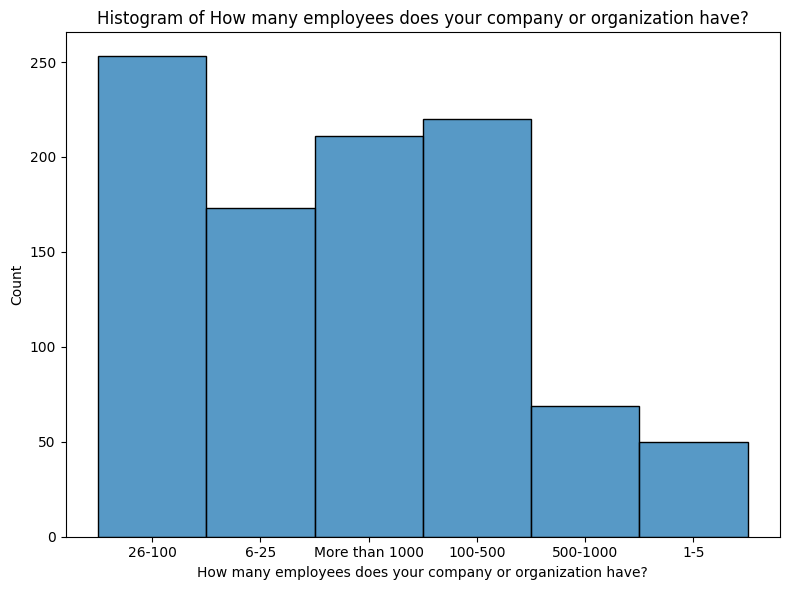

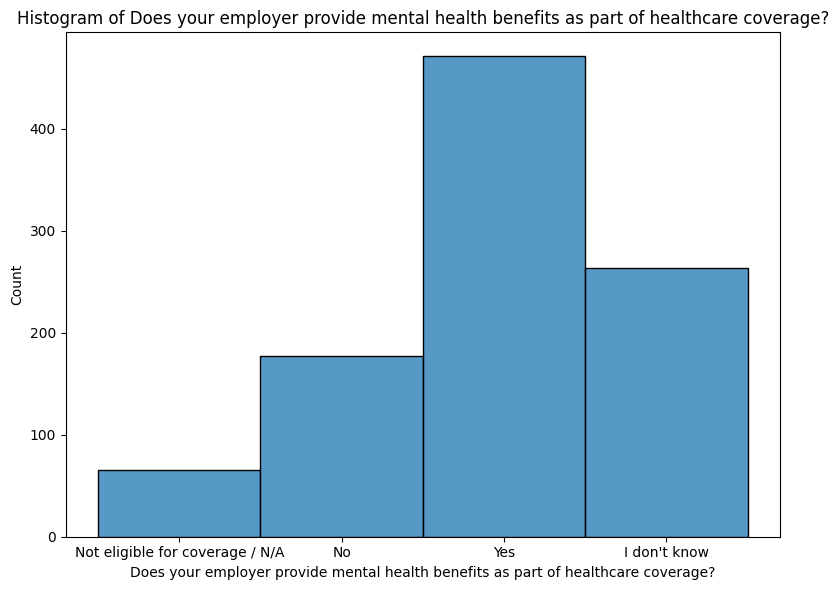

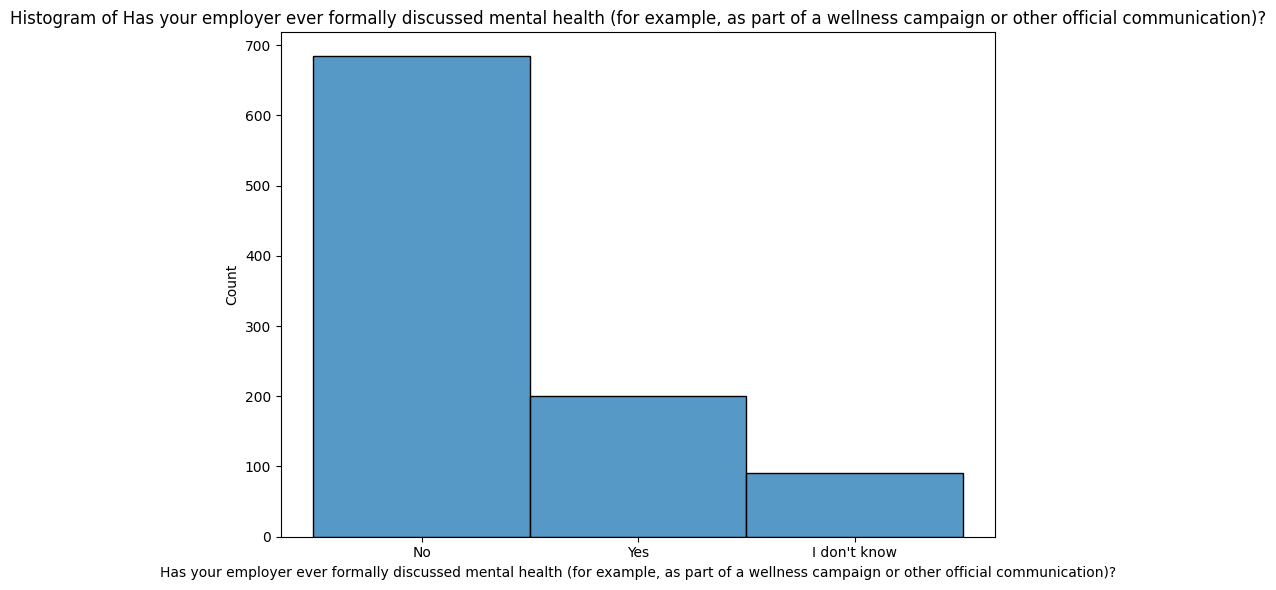

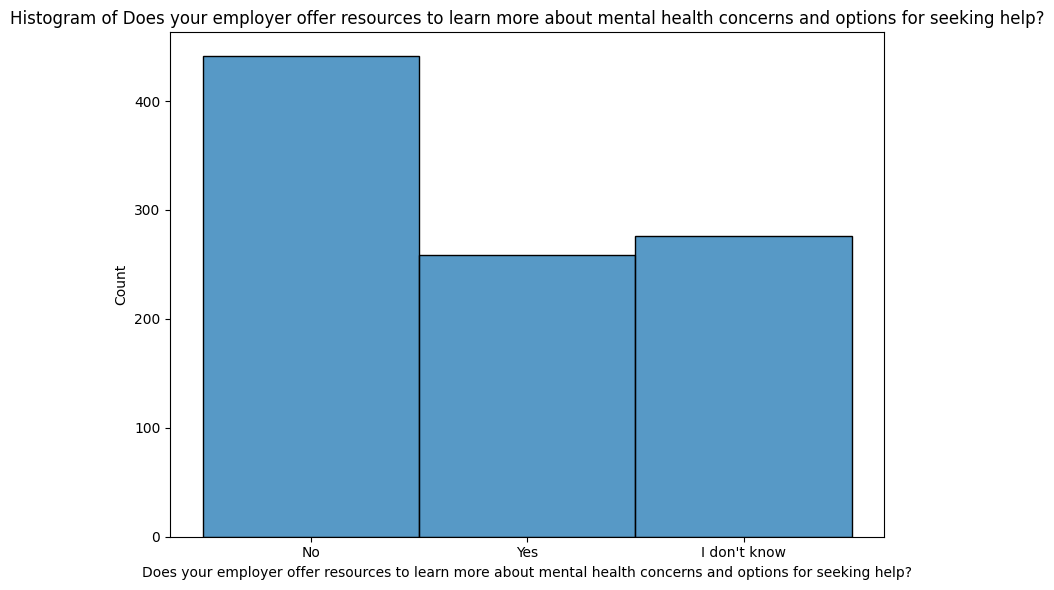

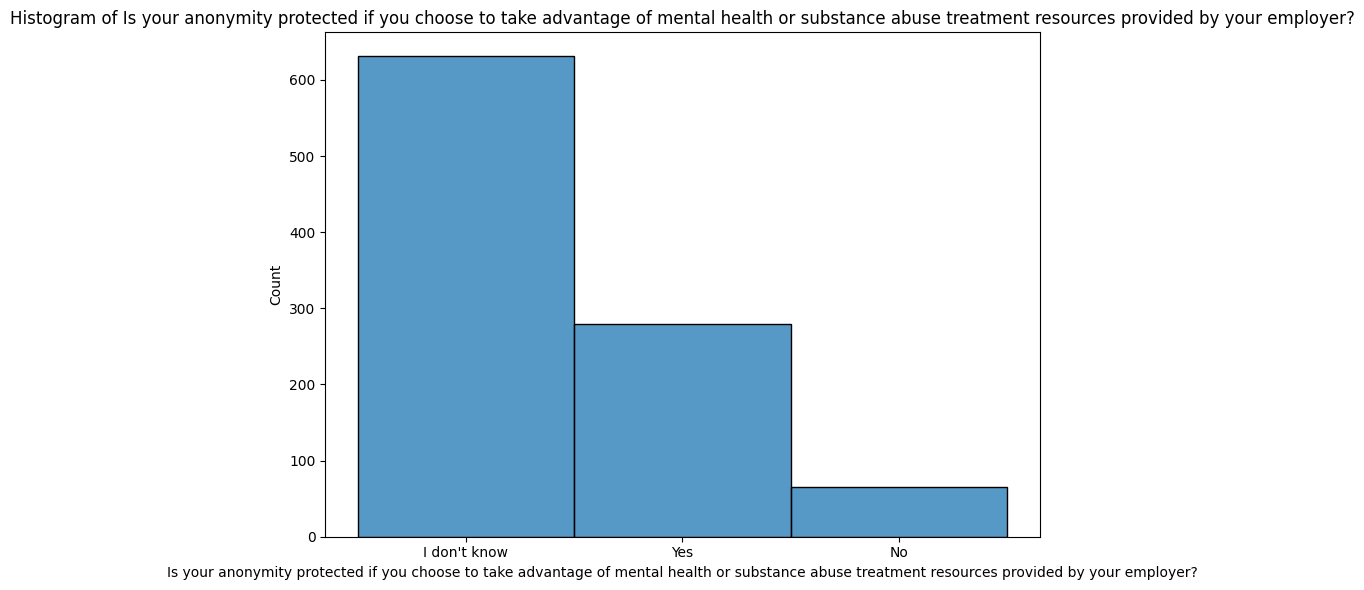

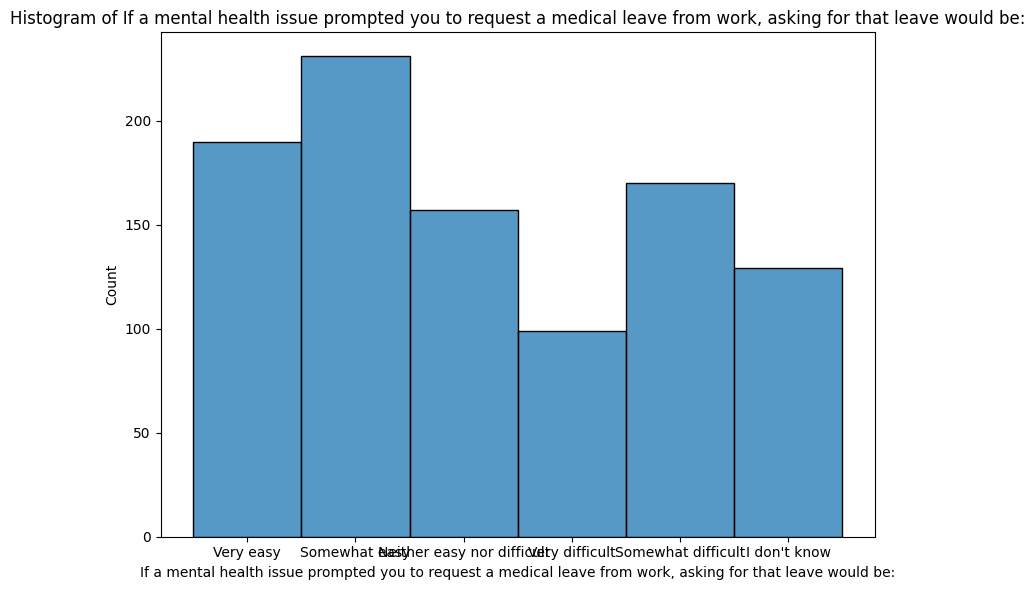

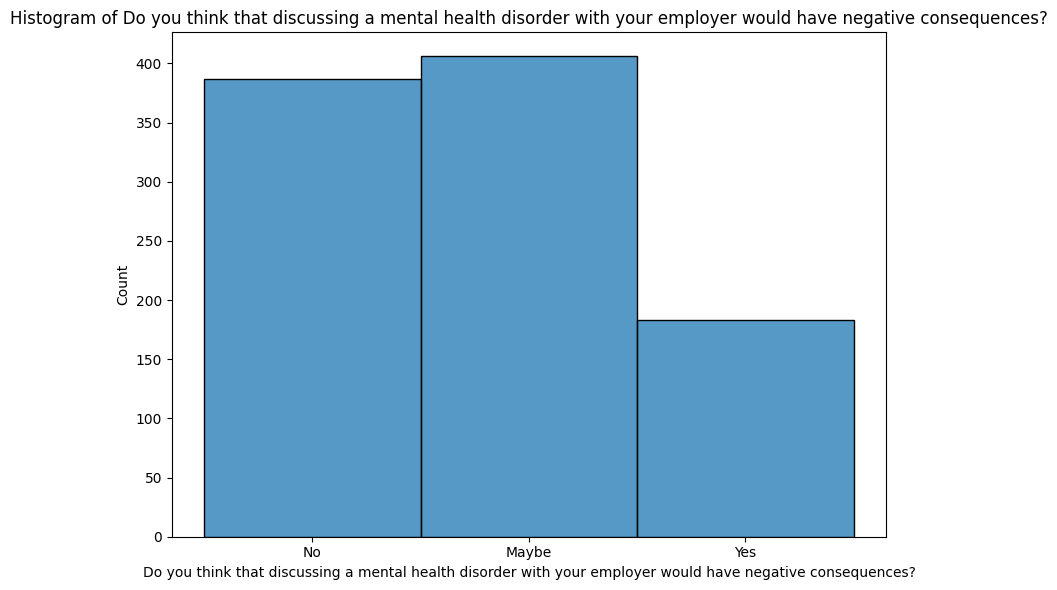

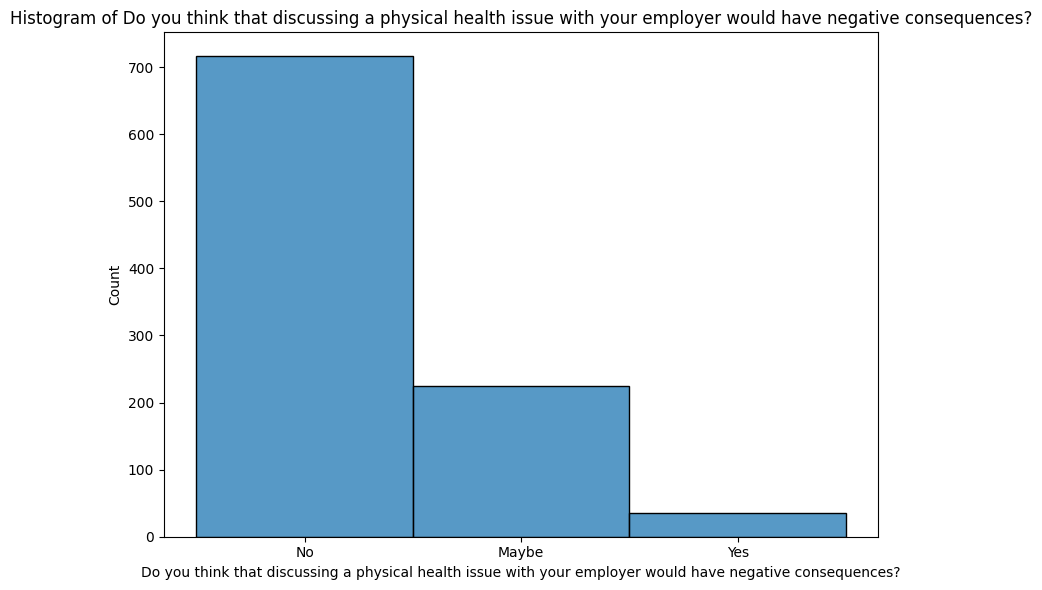

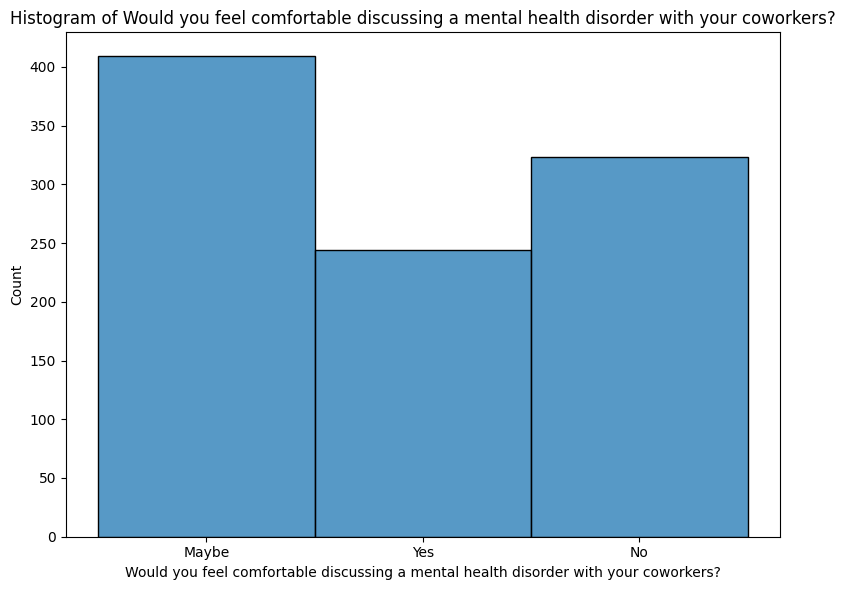

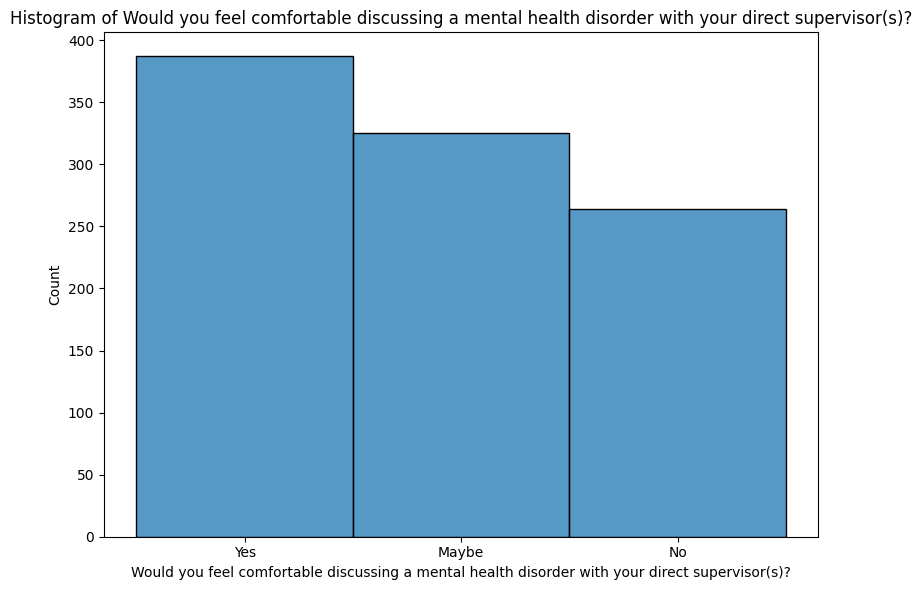

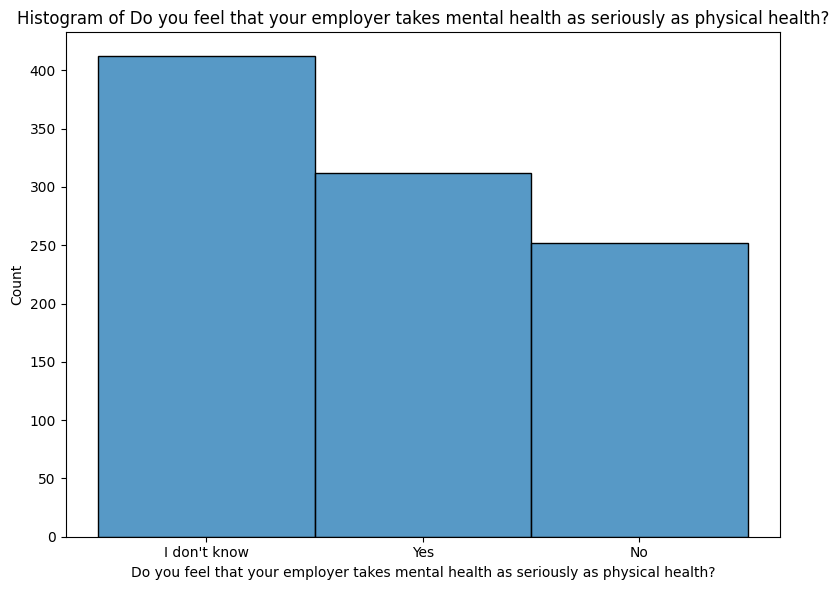

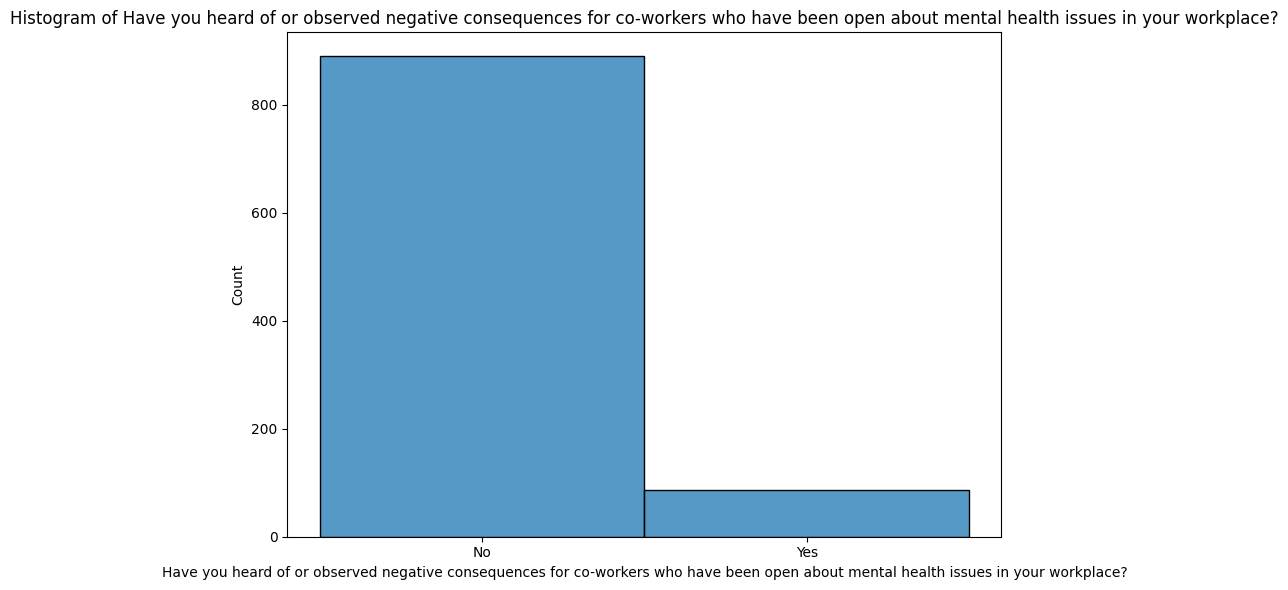

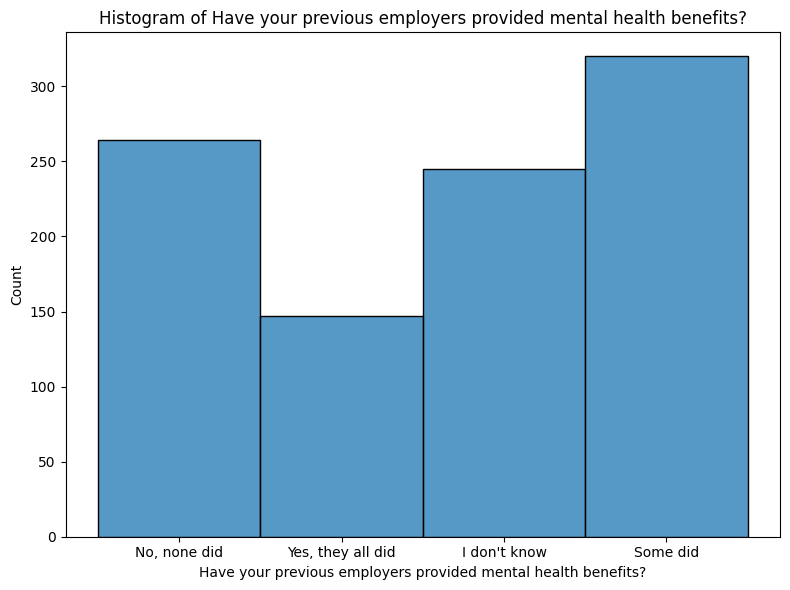

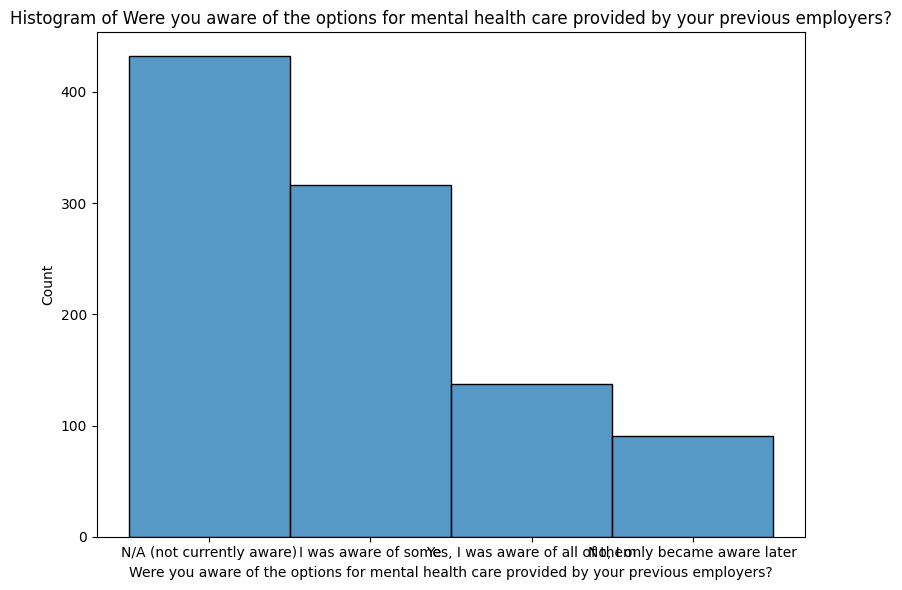

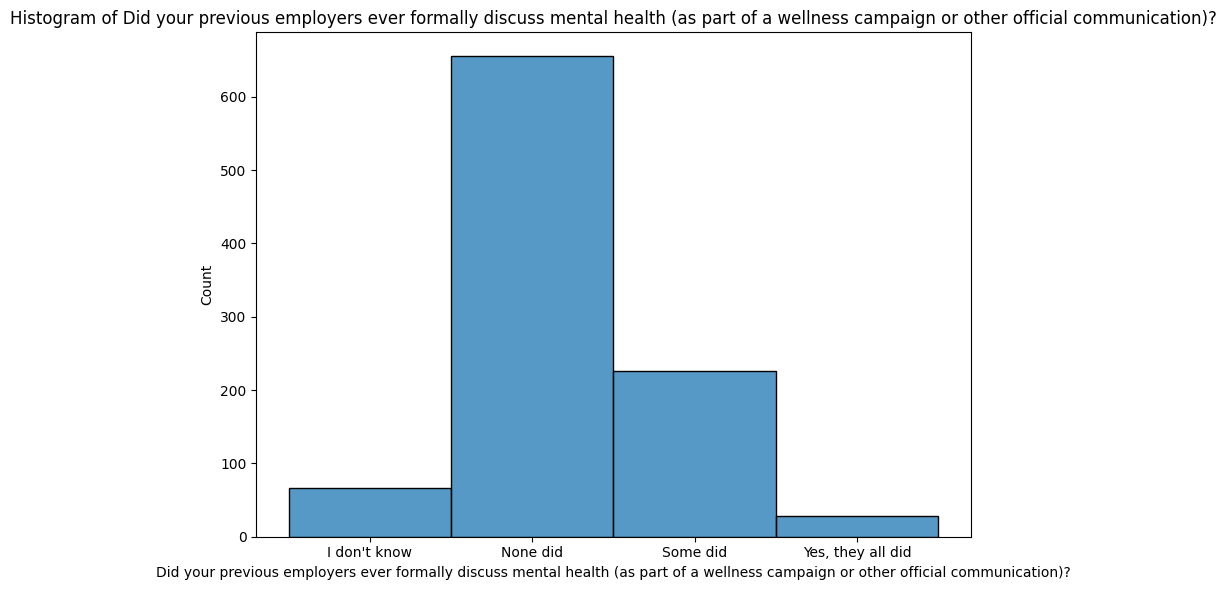

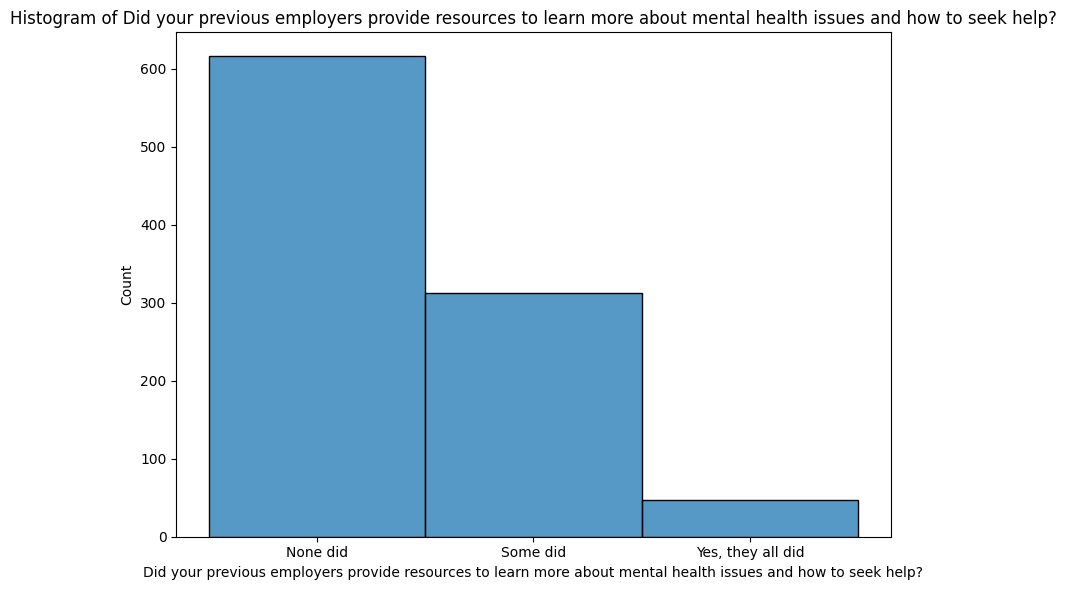

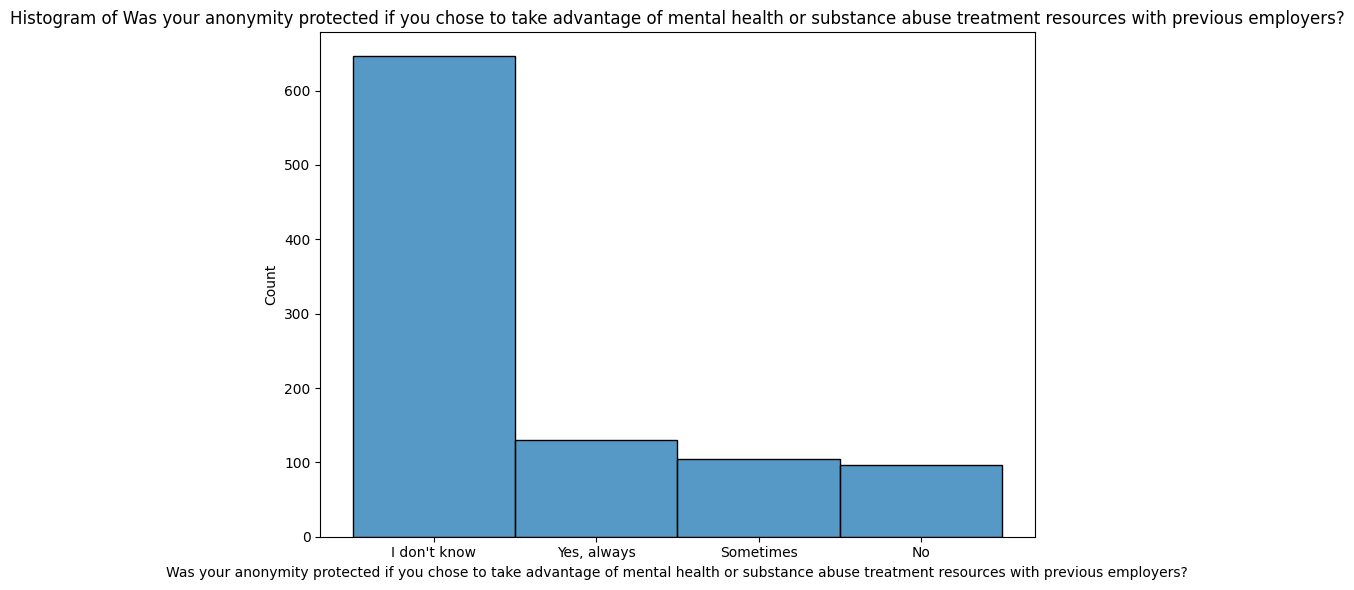

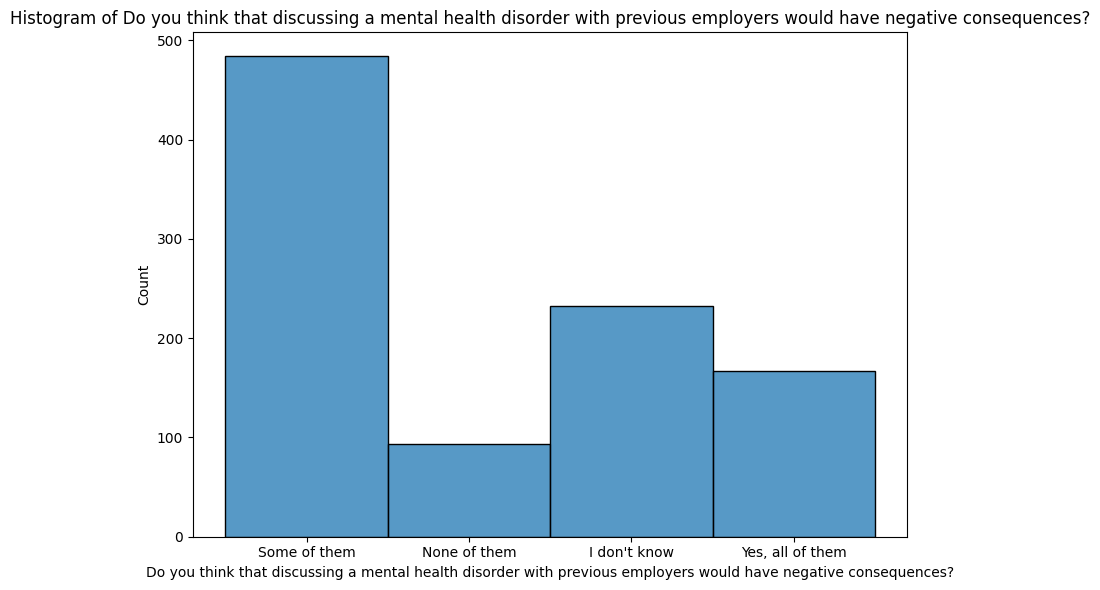

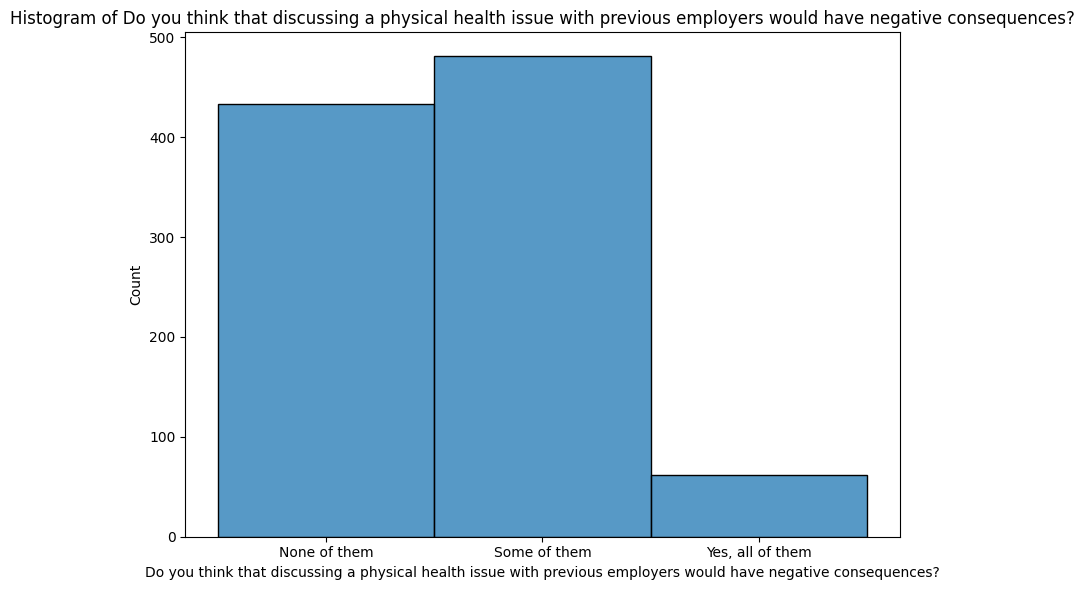

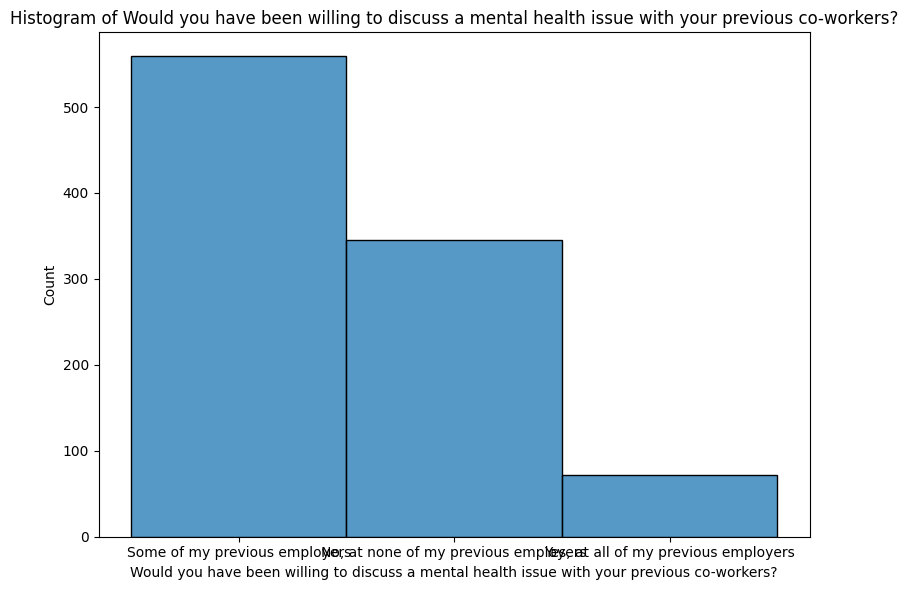

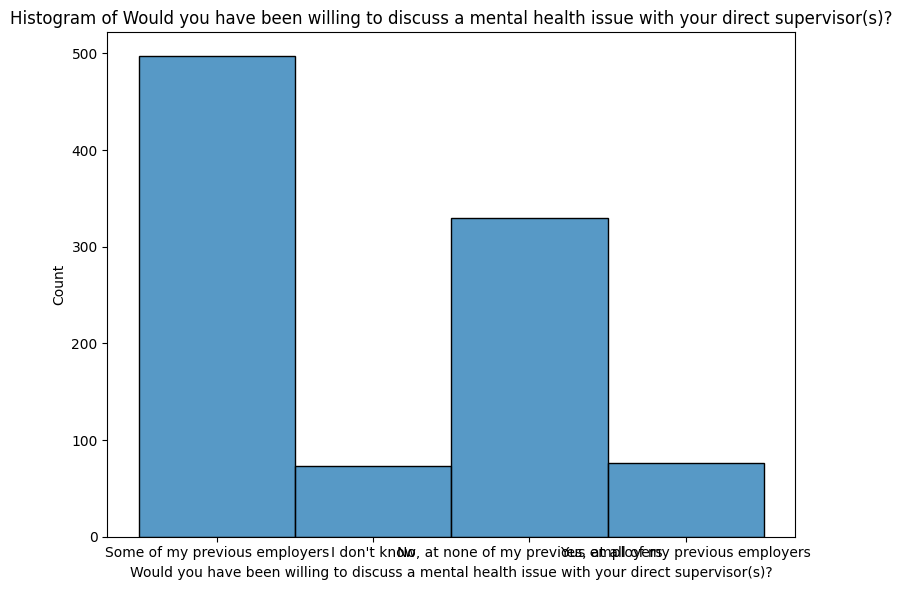

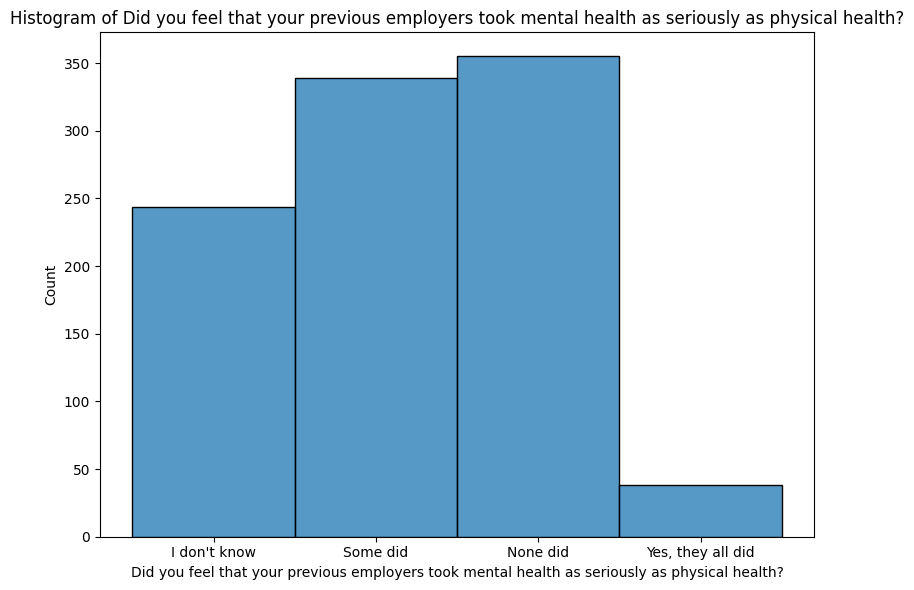

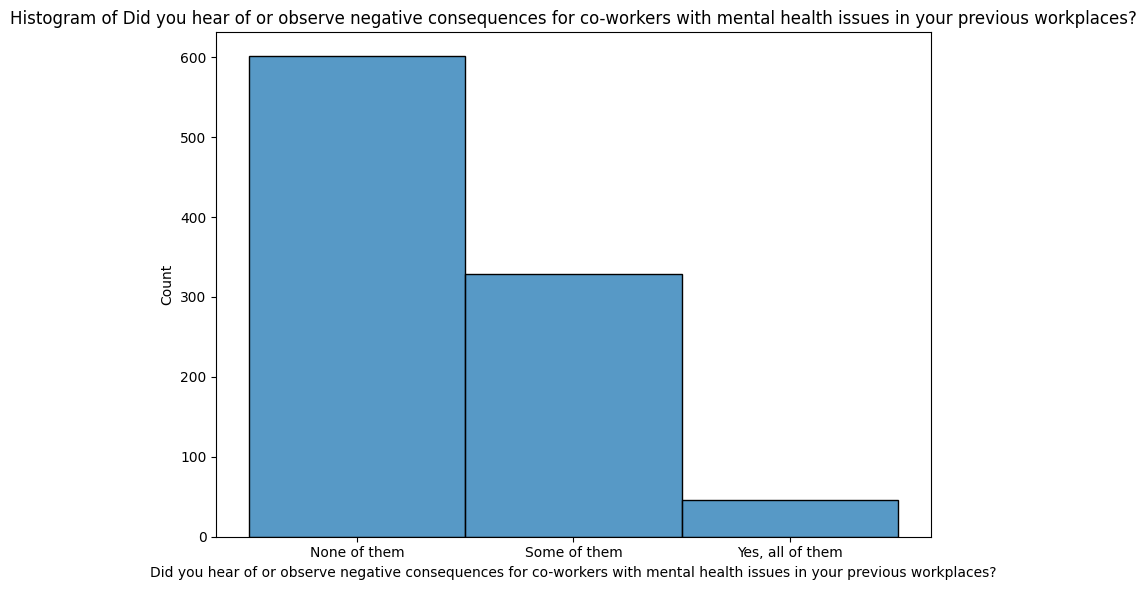

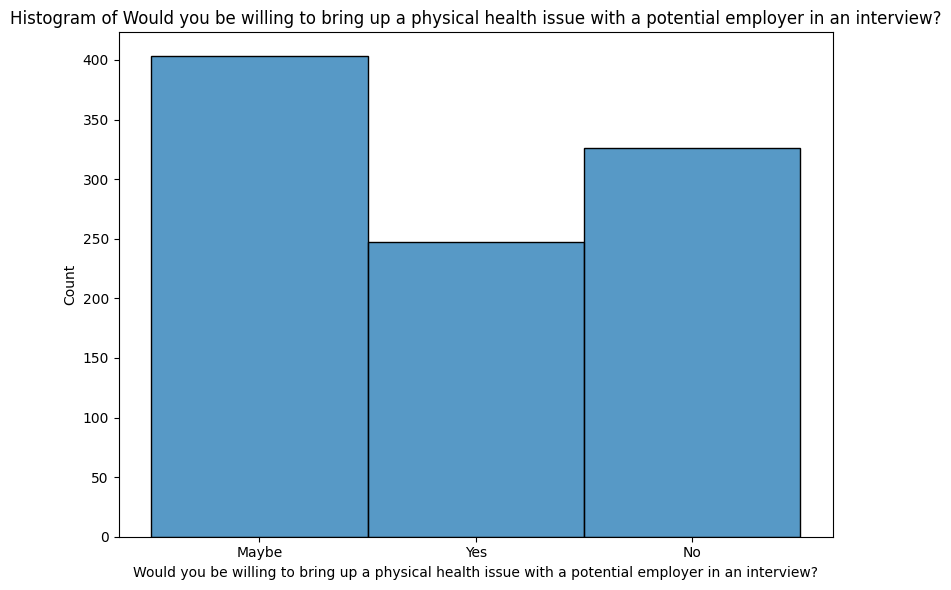

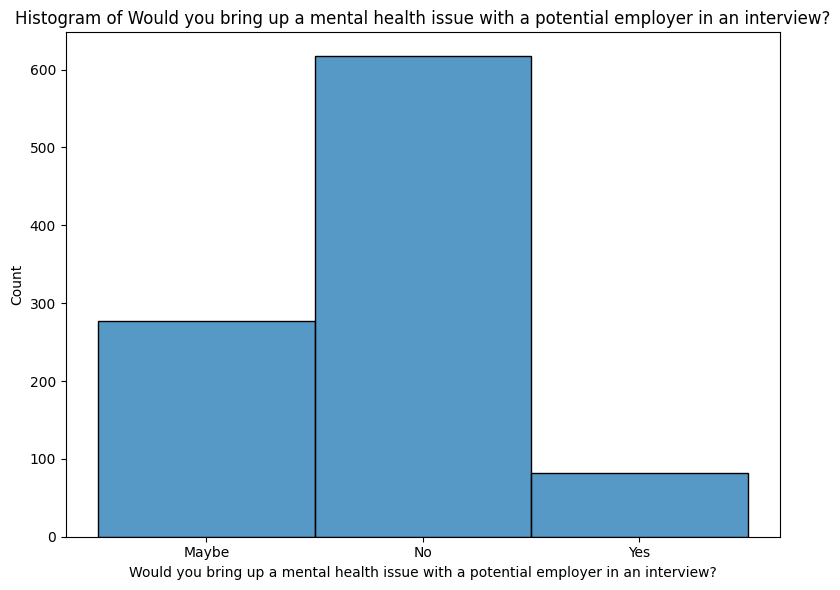

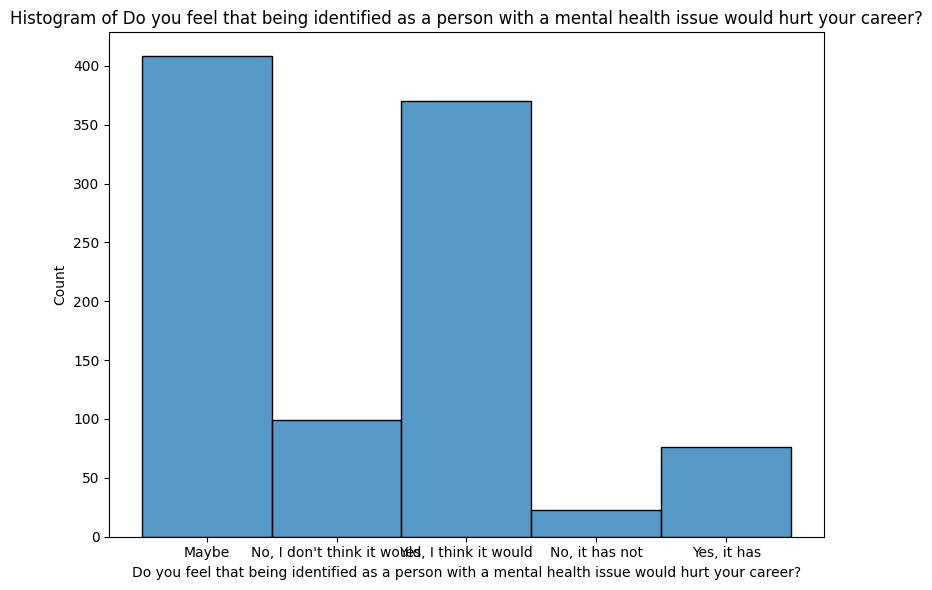

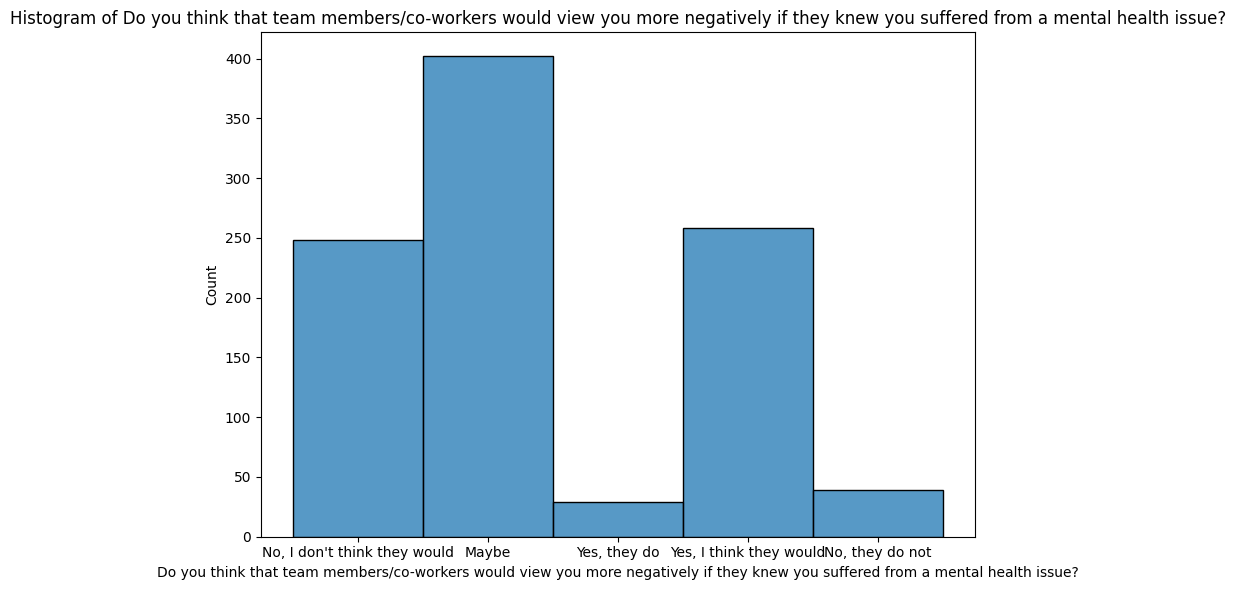

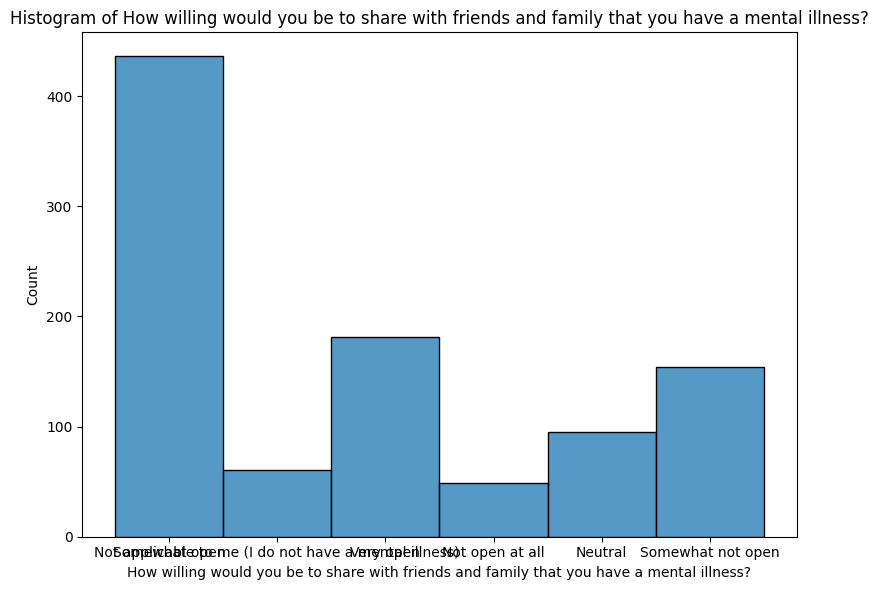

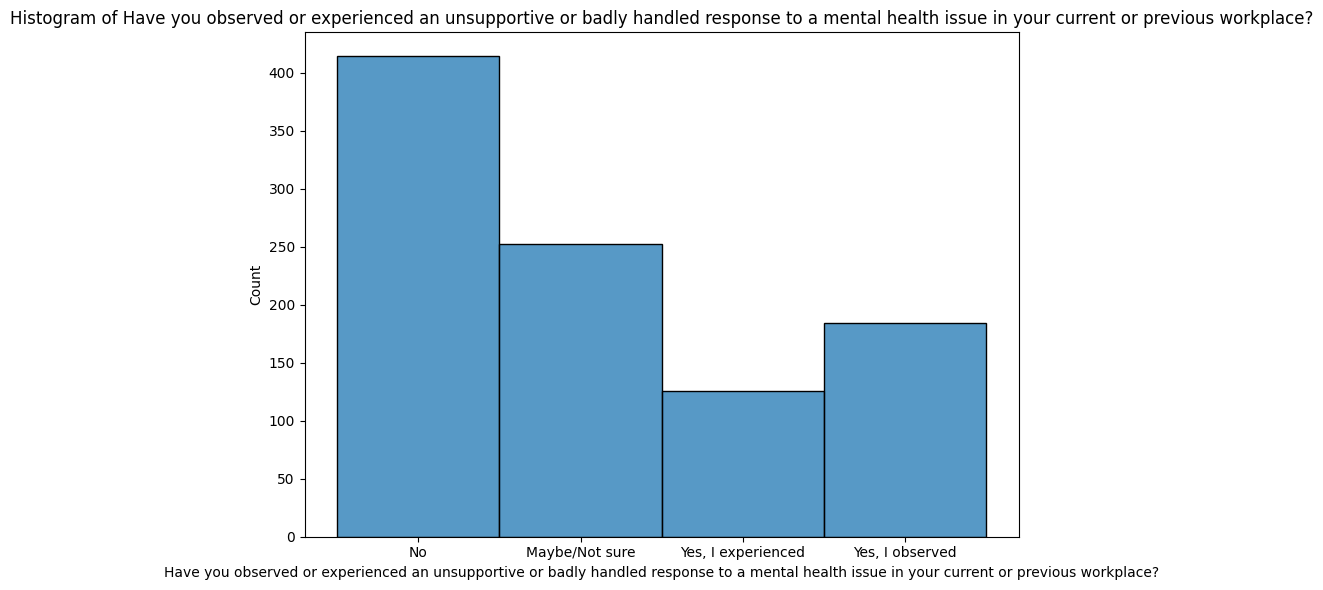

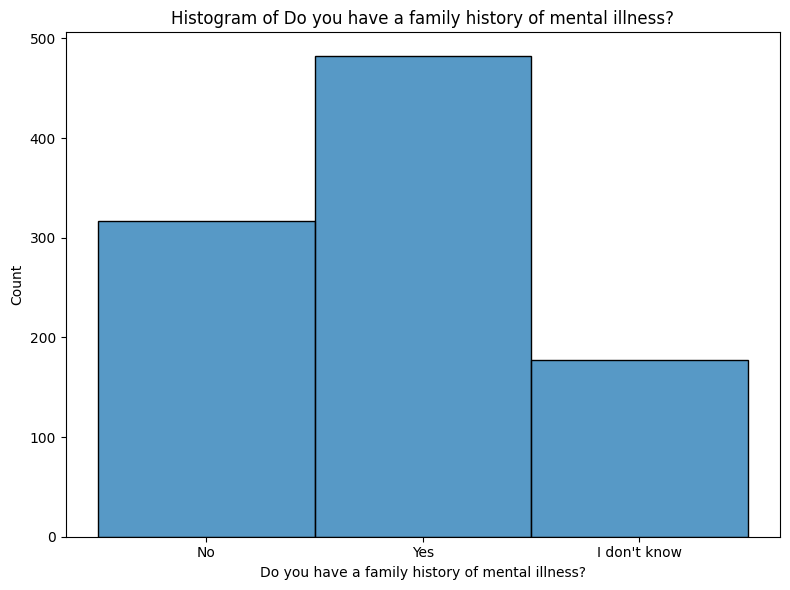

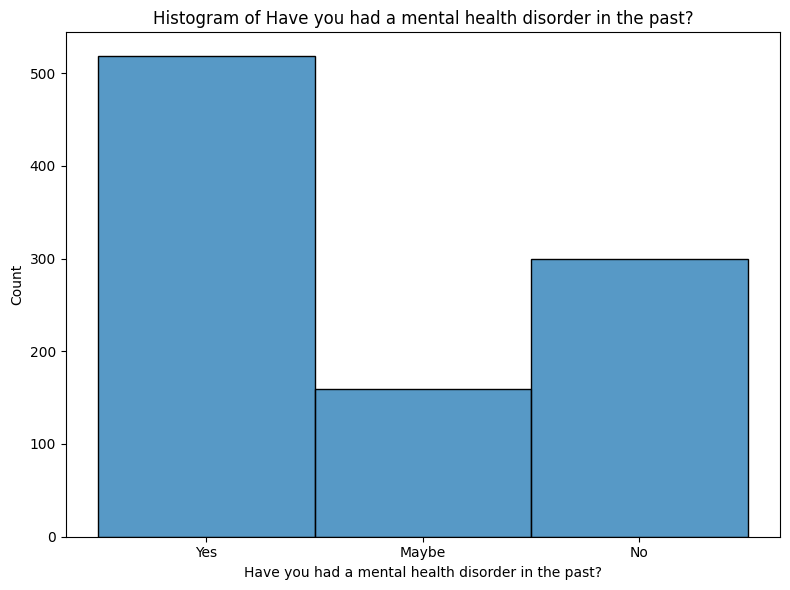

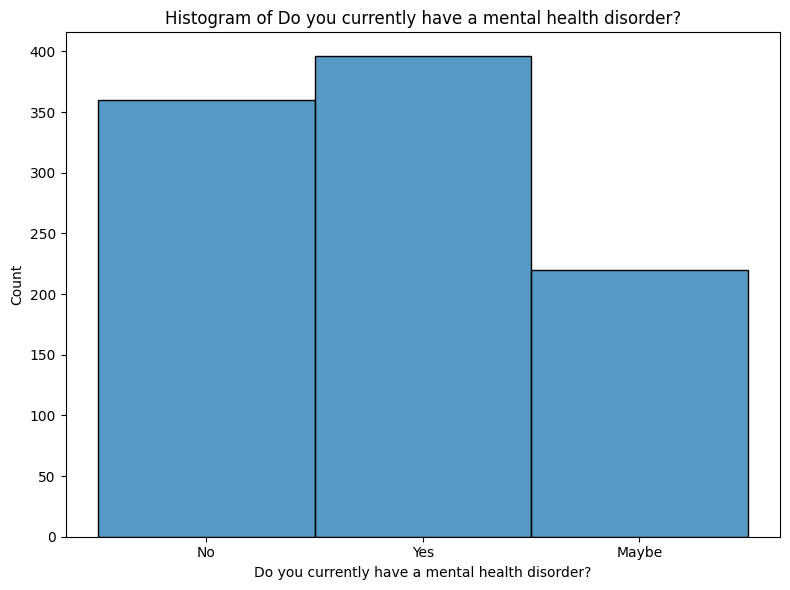

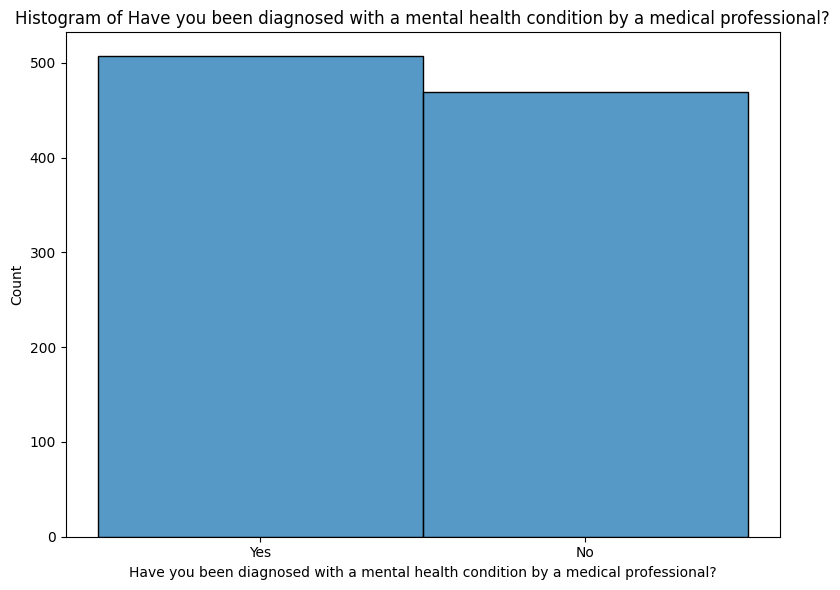

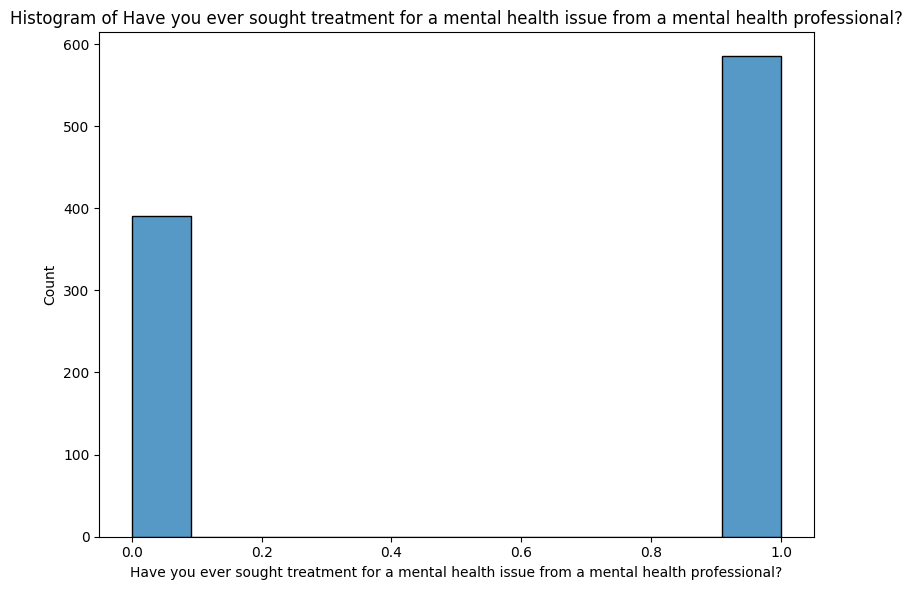

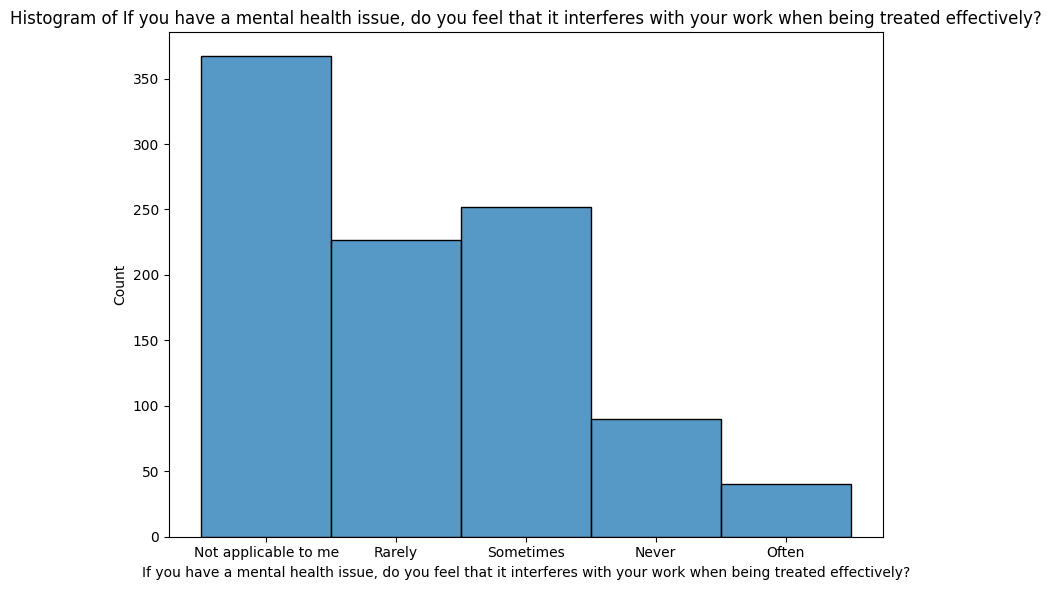

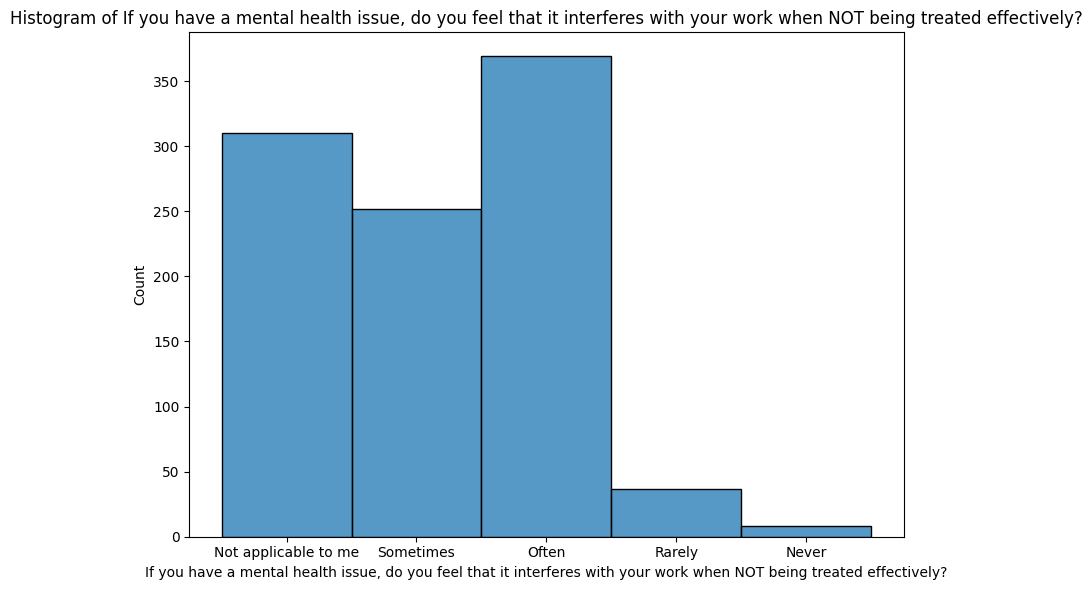

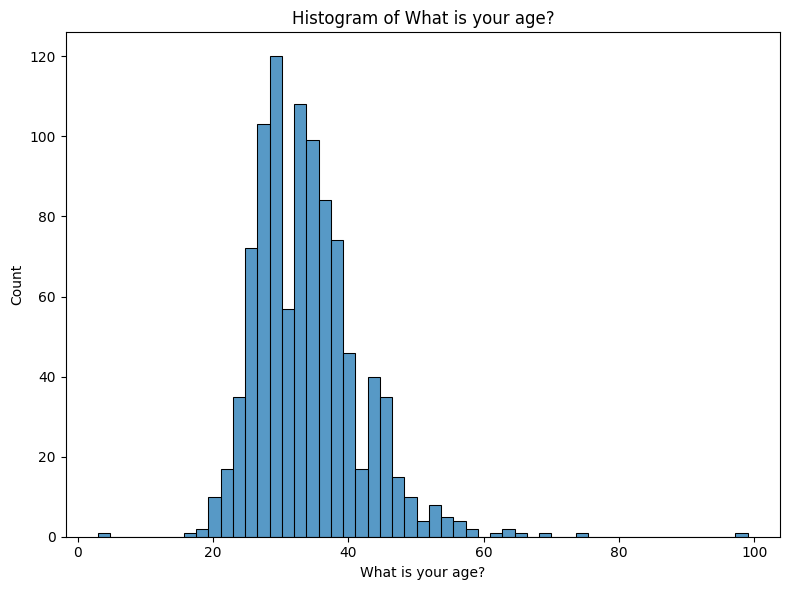

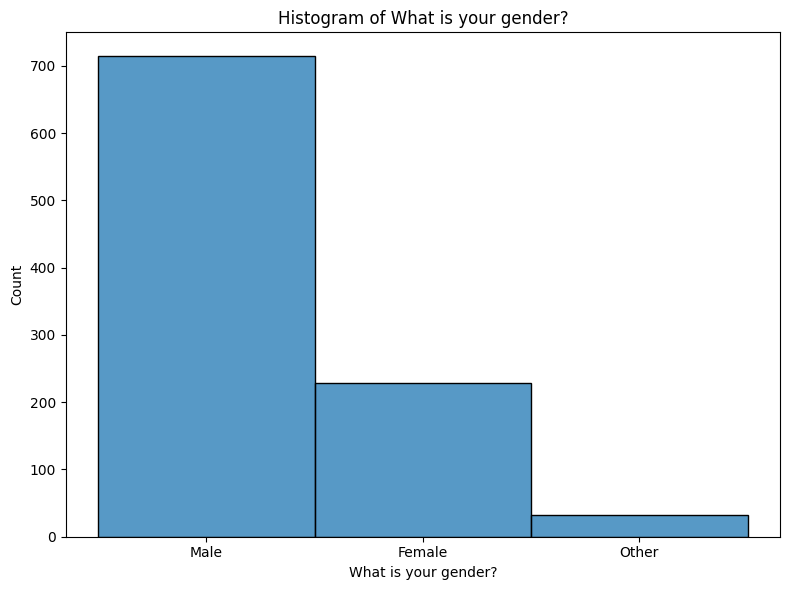

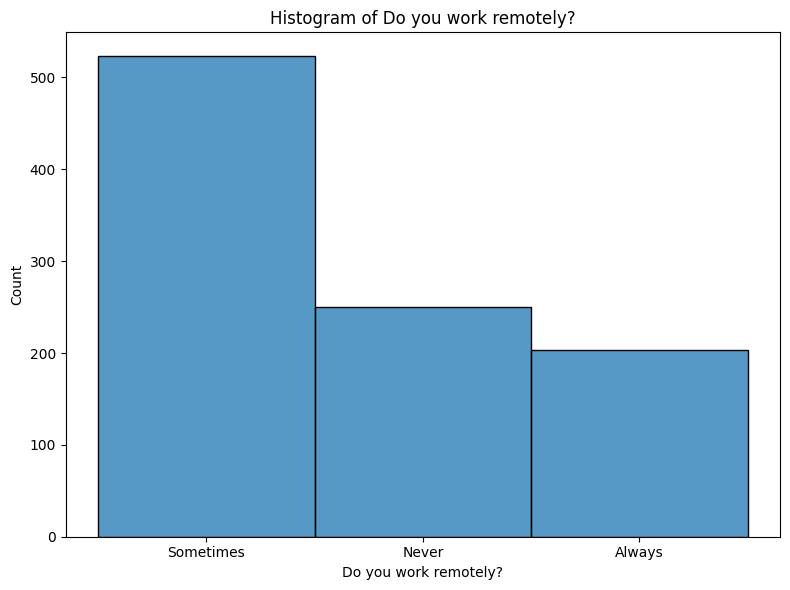

In [254]:
variables_for_histplots = [
    "How many employees does your company or organization have?",
    "Does your employer provide mental health benefits as part of healthcare coverage?",
    "Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",
    "Does your employer offer resources to learn more about mental health concerns and options for seeking help?",
    "Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?",
    "If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",
    "Do you think that discussing a mental health disorder with your employer would have negative consequences?",
    "Do you think that discussing a physical health issue with your employer would have negative consequences?",
    "Would you feel comfortable discussing a mental health disorder with your coworkers?",
    "Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?",
    "Do you feel that your employer takes mental health as seriously as physical health?",
    "Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?",
    "Have your previous employers provided mental health benefits?",
    "Were you aware of the options for mental health care provided by your previous employers?",
    "Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?",
    "Did your previous employers provide resources to learn more about mental health issues and how to seek help?",
    "Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?",
    "Do you think that discussing a mental health disorder with previous employers would have negative consequences?",
    "Do you think that discussing a physical health issue with previous employers would have negative consequences?",
    "Would you have been willing to discuss a mental health issue with your previous co-workers?",
    "Would you have been willing to discuss a mental health issue with your direct supervisor(s)?",
    "Did you feel that your previous employers took mental health as seriously as physical health?",
    "Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?",
    "Would you be willing to bring up a physical health issue with a potential employer in an interview?",
    "Would you bring up a mental health issue with a potential employer in an interview?",
    "Do you feel that being identified as a person with a mental health issue would hurt your career?",
    "Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?",
    "How willing would you be to share with friends and family that you have a mental illness?",
    "Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?",
    "Do you have a family history of mental illness?",
    "Have you had a mental health disorder in the past?",
    "Do you currently have a mental health disorder?",
    "Have you been diagnosed with a mental health condition by a medical professional?",
    "Have you ever sought treatment for a mental health issue from a mental health professional?",
    "If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?",
    "If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",
    "What is your age?",
    "What is your gender?",
    "Do you work remotely?"
]




for column in df[variables_for_histplots]:
    plt.figure(figsize=(8, 6))  
    sns.histplot(data=df, x=column)
    plt.title(f'Histogram of {column}')  
    plt.tight_layout()  
    plt.show()  

### Maps

#### Folium


In [319]:

country_coordinates = {
    'United Kingdom': [55.3781, -3.4360],
    'United States of America': [37.0902, -95.7129],
    'Canada': [56.1304, -106.3468],
    'Germany': [51.1657, 10.4515],
    'Netherlands': [52.1326, 5.2913],
    'Australia': [-25.2744, 133.7751],
    'France': [46.6034, 1.8883],
    'Brazil': [-14.2350, -51.9253],
    'Denmark': [56.2639, 9.5018],
    'Sweden': [60.1282, 18.6435],
    'Russia': [61.5240, 105.3188],
    'Spain': [40.4637, -3.7492],
    'India': [20.5937, 78.9629],
    'Mexico': [23.6345, -102.5528],
    'Switzerland': [46.8182, 8.2275],
    'Norway': [60.4720, 8.4689],
    'Argentina': [-38.4161, -63.6167],
    'Ireland': [53.1424, -7.6921],
    'Colombia': [4.5709, -74.2973],
    'Czech Republic': [49.8175, 15.4730],
    'Vietnam': [14.0583, 108.2772],
    'Finland': [61.9241, 25.7482],
    'Bulgaria': [42.7339, 25.4858],
    'South Africa': [-30.5595, 22.9375],
    'Bangladesh': [23.6850, 90.3563],
    'Pakistan': [30.3753, 69.3451],
    'New Zealand': [-40.9006, 174.8860],
    'Afghanistan': [33.9391, 67.7100],
    'Poland': [51.9194, 19.1451],
    'Iran': [32.4279, 53.6880],
    'Italy': [41.8719, 12.5674],
    'Hungary': [47.1625, 19.5033],
    'Israel': [31.0461, 34.8516],
    'Japan': [36.2048, 138.2529],
    'Austria': [47.5162, 14.5501],
    'Romania': [45.9432, 24.9668],
    'Chile': [-35.6751, -71.5430],
    'Estonia': [58.5953, 25.0136],
    'Belgium': [50.8503, 4.3517],
}


country_coordinates


{'United Kingdom': [55.3781, -3.436],
 'United States of America': [37.0902, -95.7129],
 'Canada': [56.1304, -106.3468],
 'Germany': [51.1657, 10.4515],
 'Netherlands': [52.1326, 5.2913],
 'Australia': [-25.2744, 133.7751],
 'France': [46.6034, 1.8883],
 'Brazil': [-14.235, -51.9253],
 'Denmark': [56.2639, 9.5018],
 'Sweden': [60.1282, 18.6435],
 'Russia': [61.524, 105.3188],
 'Spain': [40.4637, -3.7492],
 'India': [20.5937, 78.9629],
 'Mexico': [23.6345, -102.5528],
 'Switzerland': [46.8182, 8.2275],
 'Norway': [60.472, 8.4689],
 'Argentina': [-38.4161, -63.6167],
 'Ireland': [53.1424, -7.6921],
 'Colombia': [4.5709, -74.2973],
 'Czech Republic': [49.8175, 15.473],
 'Vietnam': [14.0583, 108.2772],
 'Finland': [61.9241, 25.7482],
 'Bulgaria': [42.7339, 25.4858],
 'South Africa': [-30.5595, 22.9375],
 'Bangladesh': [23.685, 90.3563],
 'Pakistan': [30.3753, 69.3451],
 'New Zealand': [-40.9006, 174.886],
 'Afghanistan': [33.9391, 67.71],
 'Poland': [51.9194, 19.1451],
 'Iran': [32.4279, 5

In [68]:
country_col = 'What country do you live in?'
country_counts = df[country_col].value_counts().reset_index()
country_counts.columns = ['country', 'count']

# Load the GeoJSON file for borders
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json'
geo_data = requests.get(url).json()


world_map = folium.Map(location=[20, 0], zoom_start=2)

#Choropleth map
folium.Choropleth(
    geo_data=geo_data,
    name="choropleth",
    data=country_counts,
    columns=["country", "count"],
    key_on="feature.properties.name",  # Country name field in GeoJSON
    fill_color="YlOrRd",  # Color scale
    fill_opacity=1,
    line_opacity=0.5,
    nan_fill_color="white",
    legend_name="Number of Respondents",
    highlight=True
).add_to(world_map)


folium.LayerControl().add_to(world_map)


world_map.save("survey_respondents_choropleth.html")
world_map

### Most Common disease per Country

In [78]:
# Step 1: Create a dictionary for the binary columns created
disorder_columns = [
    'Anxiety Disorder', "Mood Disorder", 'ADHD', 'OCD', 'PTSD', 'PTSD undiagnosed', 
    'Eating Disorder', 'Substance Use Disorder', 'Stress Response Syndrome', 'Personality Disorder', 
    'Pervasive Developmental Disorder', 'Psychotic Disorder', 'Addictive Disorder', 'Dissociative Disorder',
    'Seasonal Affective Disorder', 'Schizotypal Personality Disorder', 'Traumatic Brain Injury',
    'Sexual Addiction', 'Autism', 'ADD w/o Hyperactivity'
]

# Step 2: Group by country and calculate the sum of each disorder's binary column
grouped_df = df.groupby('What country do you live in?')[disorder_columns].sum().reset_index()

# Step 3: Find the most frequent disorder for each country
# Create a new column 'most_common_disorder' to store the most common disorder for each country
grouped_df['most_common_disorder'] = grouped_df[disorder_columns].idxmax(axis=1)

# Step 4: Clean up disorder names to remove '_', etc., if necessary
grouped_df['most_common_disorder'] = grouped_df['most_common_disorder'].str.replace('_', ' ')

# Check the result
print(grouped_df[['What country do you live in?', 'most_common_disorder']].head())


  What country do you live in? most_common_disorder
0                  Afghanistan     Anxiety Disorder
1                    Argentina     Anxiety Disorder
2                    Australia        Mood Disorder
3                      Austria     Anxiety Disorder
4                   Bangladesh        Mood Disorder


In [79]:
# Step 5: Define a color for each mental health disorder
disorder_colors = {
    'Anxiety Disorder': '#FF9999',        # Light Red
    'Mood Disorder': '#9999FF',           # Light Blue
    'ADHD': '#66C2A5',                    # Green
    'OCD': '#FC8D62',                     # Orange
    'PTSD': '#8DA0CB',                    # Purple
    'PTSD undiagnosed': '#8D8DAA',        # Another Purple for undiagnosed PTSD
    'Eating Disorder': '#E78AC3',         # Pink
    'Substance Use Disorder': '#A6D854',  # Yellow-Green
    'Stress Response Syndrome': '#FFD700', # Gold
    'Personality Disorder': '#FF6347',    # Tomato
    'Pervasive Developmental Disorder': '#1E90FF', # DodgerBlue
    'Psychotic Disorder': '#FF4500',      # OrangeRed
    'Addictive Disorder': '#32CD32',      # LimeGreen
    'Dissociative Disorder': '#9400D3',   # DarkViolet
    'Seasonal Affective Disorder': '#5F9EA0', # CadetBlue
    'Schizotypal Personality Disorder': '#4B0082', # Indigo
    'Traumatic Brain Injury': '#7FFF00',  # Chartreuse
    'Sexual Addiction': '#FF69B4',        # HotPink
    'Autism': '#8A2BE2',                  # BlueViolet
    'ADD w/o Hyperactivity': '#CD5C5C'    # IndianRed
}

# Step 6: Create the Folium map
world_map = folium.Map(location=[20, 0], zoom_start=2)

# Step 7: Add a Choropleth layer with the most common disorder and corresponding color
for feature in geo_data['features']:
    country_name = feature['properties']['name']
    
    # Find the corresponding row in the DataFrame
    row = grouped_df[grouped_df['What country do you live in?'] == country_name]
    
    # If the country is present in the dataset
    if not row.empty:
        disorder = row['most_common_disorder'].values[0]
        color = disorder_colors.get(disorder, 'white')  # Get color or default to white
    else:
        # If no data for the country, color it white
        color = 'white'
    
    # Create a GeoJson for each country with the assigned color
    folium.GeoJson(
        feature,
        style_function=lambda feature, color=color: {
            'fillColor': color,
            'color': 'black',
            'weight': 0.5,
            'fillOpacity': 0.7
        },
        tooltip=f"{country_name}: {disorder if not row.empty else 'No Data'}"
    ).add_to(world_map)


    legend_html = '''
<div style="position: fixed;
     bottom: 50px; left: 50px; width: 200px; height: 150px;
     background-color: white; border:2px solid grey; z-index:9999; font-size:16px;
     ">
     &nbsp; <b>Mental Health Disorders</b> <br>
     &nbsp; Anxiety Disorder <i style="background:#FF9999;width:15px;height:15px;float:right;margin-right:15px;"></i><br>
     &nbsp; Mood Disorder <i style="background:#9999FF;width:15px;height:15px;float:right;margin-right:15px;"></i><br>
     &nbsp; ADHD <i style="background:#66C2A5;width:15px;height:15px;float:right;margin-right:15px;"></i><br>
     &nbsp; *White countries no data </i><br>
     &nbsp;   available* 

</div>
'''

# Step 4: Add the custom legend to the map
    world_map.get_root().html.add_child(folium.Element(legend_html))

# Step 8: Add Layer Control
folium.LayerControl().add_to(world_map)

# Display the map
world_map


### Correlation

In [ ]:
columns_to_convert = [
    "How many employees does your company or organization have?",
    "Does your employer provide mental health benefits as part of healthcare coverage?",
    "Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",
    "Does your employer offer resources to learn more about mental health concerns and options for seeking help?",
    "Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?",
    "If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",
    "Do you think that discussing a mental health disorder with your employer would have negative consequences?",
    "Do you think that discussing a physical health issue with your employer would have negative consequences?",
    "Would you feel comfortable discussing a mental health disorder with your coworkers?",
    "Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?",
    "Do you feel that your employer takes mental health as seriously as physical health?",
    "Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?",
    "Have your previous employers provided mental health benefits?",
    "Were you aware of the options for mental health care provided by your previous employers?",
    "Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?",
    "Did your previous employers provide resources to learn more about mental health issues and how to seek help?",
    "Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?",
    "Do you think that discussing a mental health disorder with previous employers would have negative consequences?",
    "Do you think that discussing a physical health issue with previous employers would have negative consequences?",
    "Would you have been willing to discuss a mental health issue with your previous co-workers?",
    "Would you have been willing to discuss a mental health issue with your direct supervisor(s)?",
    "Did you feel that your previous employers took mental health as seriously as physical health?",
    "Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?",
    "Would you be willing to bring up a physical health issue with a potential employer in an interview?",
    "Would you bring up a mental health issue with a potential employer in an interview?",
    "Do you feel that being identified as a person with a mental health issue would hurt your career?",
    "Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?",
    "How willing would you be to share with friends and family that you have a mental illness?",
    "Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?",
    "Do you have a family history of mental illness?",
    "Have you had a mental health disorder in the past?",
    "Do you currently have a mental health disorder?",
    "Have you been diagnosed with a mental health condition by a medical professional?",
    "If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?",
    "If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",
    "What is your gender?",
    "Do you work remotely?"
]

# Performing one-hot encoding for categorical variables and keeping numerical columns intact
encoded_data = pd.get_dummies(df[columns_to_convert], drop_first=True)



### Which type of mental disorder in tech companies


In [7]:
filtered_disorders = df[df["If so, what condition(s) were you diagnosed with?"]!="Not Applicable"]
disorder_counts = filtered_disorders["If so, what condition(s) were you diagnosed with?"].value_counts()
top_10_disorders = disorder_counts.head(10)

In [8]:
df['Anxiety Disorder'] = df['If yes, what condition(s) have you been diagnosed with?'].str.contains('Anxiety Disorder')
df['Mood Disorder'] = df['If yes, what condition(s) have you been diagnosed with?'].str.contains('Mood Disorder')
df['ADHD'] = df['If yes, what condition(s) have you been diagnosed with?'].str.contains('Attention')
df['OCD'] = df['If yes, what condition(s) have you been diagnosed with?'].str.contains('Compulsive')
df['PTSD'] = df['If yes, what condition(s) have you been diagnosed with?'].str.contains('Post')
df['PTSD undiagnosed'] = df['If yes, what condition(s) have you been diagnosed with?'].str.contains('PTSD \(undiagnosed\)')
df['Eating Disorder'] = df['If yes, what condition(s) have you been diagnosed with?'].str.contains('Eating')
df['Substance Use Disorder'] = df['If yes, what condition(s) have you been diagnosed with?'].str.contains('Substance')
df['Stress Response Syndrome'] = df['If yes, what condition(s) have you been diagnosed with?'].str.contains('Stress Response')
df['Personality Disorder'] = df['If yes, what condition(s) have you been diagnosed with?'].str.contains('Personality Disorder')
df['Pervasive Developmental Disorder'] = df['If yes, what condition(s) have you been diagnosed with?'].str.contains('Pervasive')
df['Psychotic Disorder'] = df['If yes, what condition(s) have you been diagnosed with?'].str.contains('Psychotic')
df['Addictive Disorder'] = df['If yes, what condition(s) have you been diagnosed with?'].str.contains('Addictive Disorder')
df['Dissociative Disorder'] = df['If yes, what condition(s) have you been diagnosed with?'].str.contains('Dissociative')
df['Seasonal Affective Disorder'] = df['If yes, what condition(s) have you been diagnosed with?'].str.contains('Seasonal')
df['Schizotypal Personality Disorder'] = df['If yes, what condition(s) have you been diagnosed with?'].str.contains('Schizotypal')
df['Traumatic Brain Injury'] = df['If yes, what condition(s) have you been diagnosed with?'].str.contains('Brain')
df['Sexual Addiction'] = df['If yes, what condition(s) have you been diagnosed with?'].str.contains('Sexual')
df['Autism'] = df['If yes, what condition(s) have you been diagnosed with?'].str.contains('Autism')
df['ADD w/o Hyperactivity'] = df['If yes, what condition(s) have you been diagnosed with?'].str.contains('ADD \(w/o Hyperactivity\)')


<>:6: SyntaxWarning: invalid escape sequence '\('
<>:20: SyntaxWarning: invalid escape sequence '\('
<>:6: SyntaxWarning: invalid escape sequence '\('
<>:20: SyntaxWarning: invalid escape sequence '\('
C:\Users\filip\AppData\Local\Temp\ipykernel_12868\3305911395.py:6: SyntaxWarning: invalid escape sequence '\('
  df['PTSD undiagnosed'] = df['If yes, what condition(s) have you been diagnosed with?'].str.contains('PTSD \(undiagnosed\)')
C:\Users\filip\AppData\Local\Temp\ipykernel_12868\3305911395.py:20: SyntaxWarning: invalid escape sequence '\('
  df['ADD w/o Hyperactivity'] = df['If yes, what condition(s) have you been diagnosed with?'].str.contains('ADD \(w/o Hyperactivity\)')


In [9]:
df_no_MHD = df.loc[(df['Do you currently have a mental health disorder?'] == 'No')]
df_anx_dep = df.loc[(df['Anxiety Disorder'] == 1) & (df['Mood Disorder'] == 1)]
df_adhd = df.loc[(df['ADHD'] == 1)]
df_ocd = df.loc[(df['OCD'] == 1)]
df_ptsd = df.loc[(df['PTSD'] == 1)]

C:\Users\filip\AppData\Local\Temp\ipykernel_12868\3457638088.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x=df_group, y=df_group_values, palette=colors, alpha=0.95)


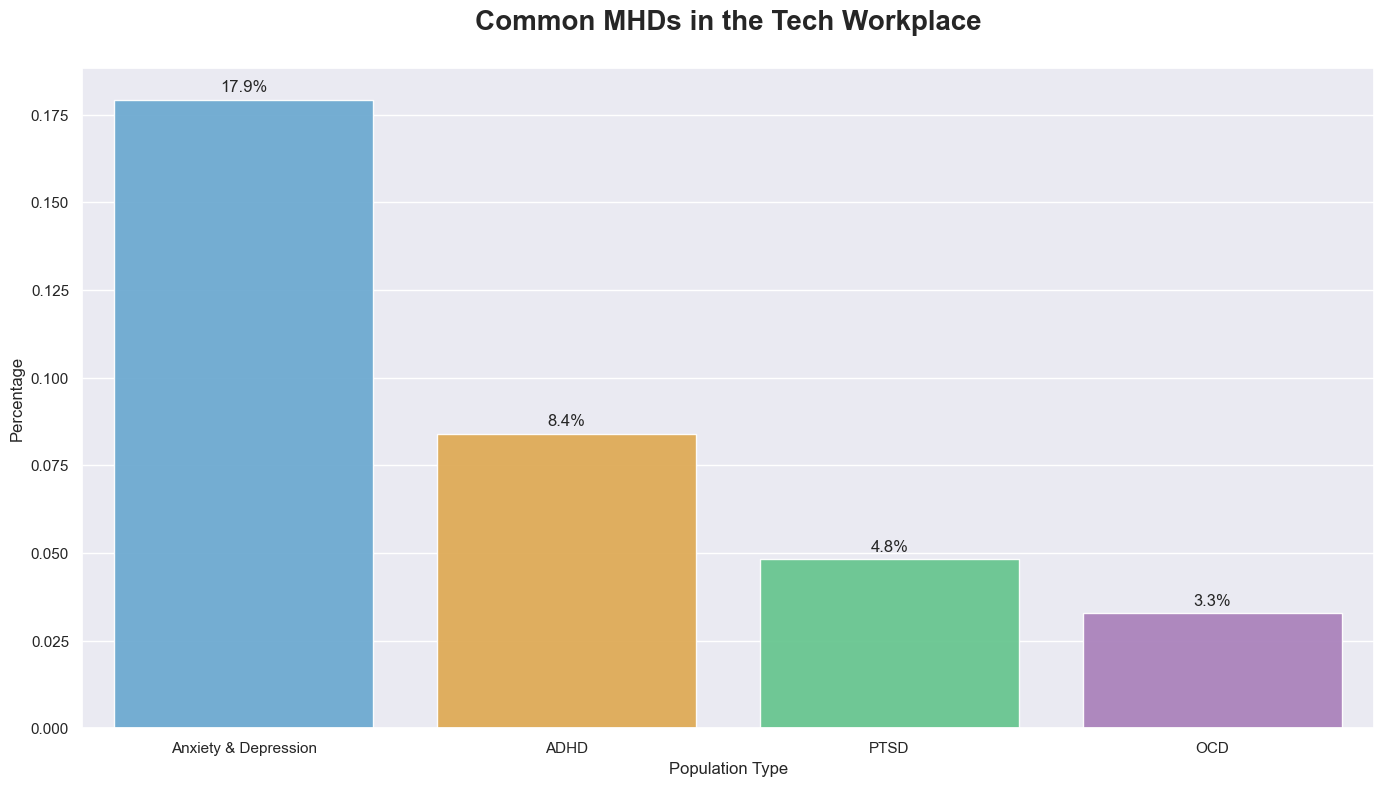

In [10]:
df_group = ['Anxiety & Depression', 'ADHD','PTSD', 'OCD']
df_group_values =  [len(df_anx_dep)/len(df), 
                   len(df_adhd)/len(df),len(df_ptsd)/len(df), len(df_ocd)/len(df)]

colors = ['#5DADE2', '#F5B041', '#58D68D', '#AF7AC5']

# Create the bar plot
sns.set(style="darkgrid")
plt.figure(figsize=(14, 8))

ax1 = sns.barplot(x=df_group, y=df_group_values, palette=colors, alpha=0.95)
ax1.set(xlabel='Population Type', ylabel='Percentage')

# Annotate the bars with the percentages
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.1%'),  # Convert value to percentage
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', 
                 xytext=(0, 9), 
                 textcoords='offset points')

# Add the title
plt.text(1.5, max(df_group_values) + 0.02, 'Common MHDs in the Tech Workplace', 
         weight='bold', ha='center', fontsize=20)

# Ensure layout is tight
plt.tight_layout()

# Show plot
plt.show()

C:\Users\filip\AppData\Local\Temp\ipykernel_19364\2078597603.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="What is your gender?",
C:\Users\filip\AppData\Local\Temp\ipykernel_19364\2078597603.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="What is your gender?",
C:\Users\filip\AppData\Local\Temp\ipykernel_19364\2078597603.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="What is your gender?",
C:\Users\filip\AppData\Local\Temp\ipykernel_19364\2078597603.py:40: FutureWarning: 

Passing `palette` without assigning 

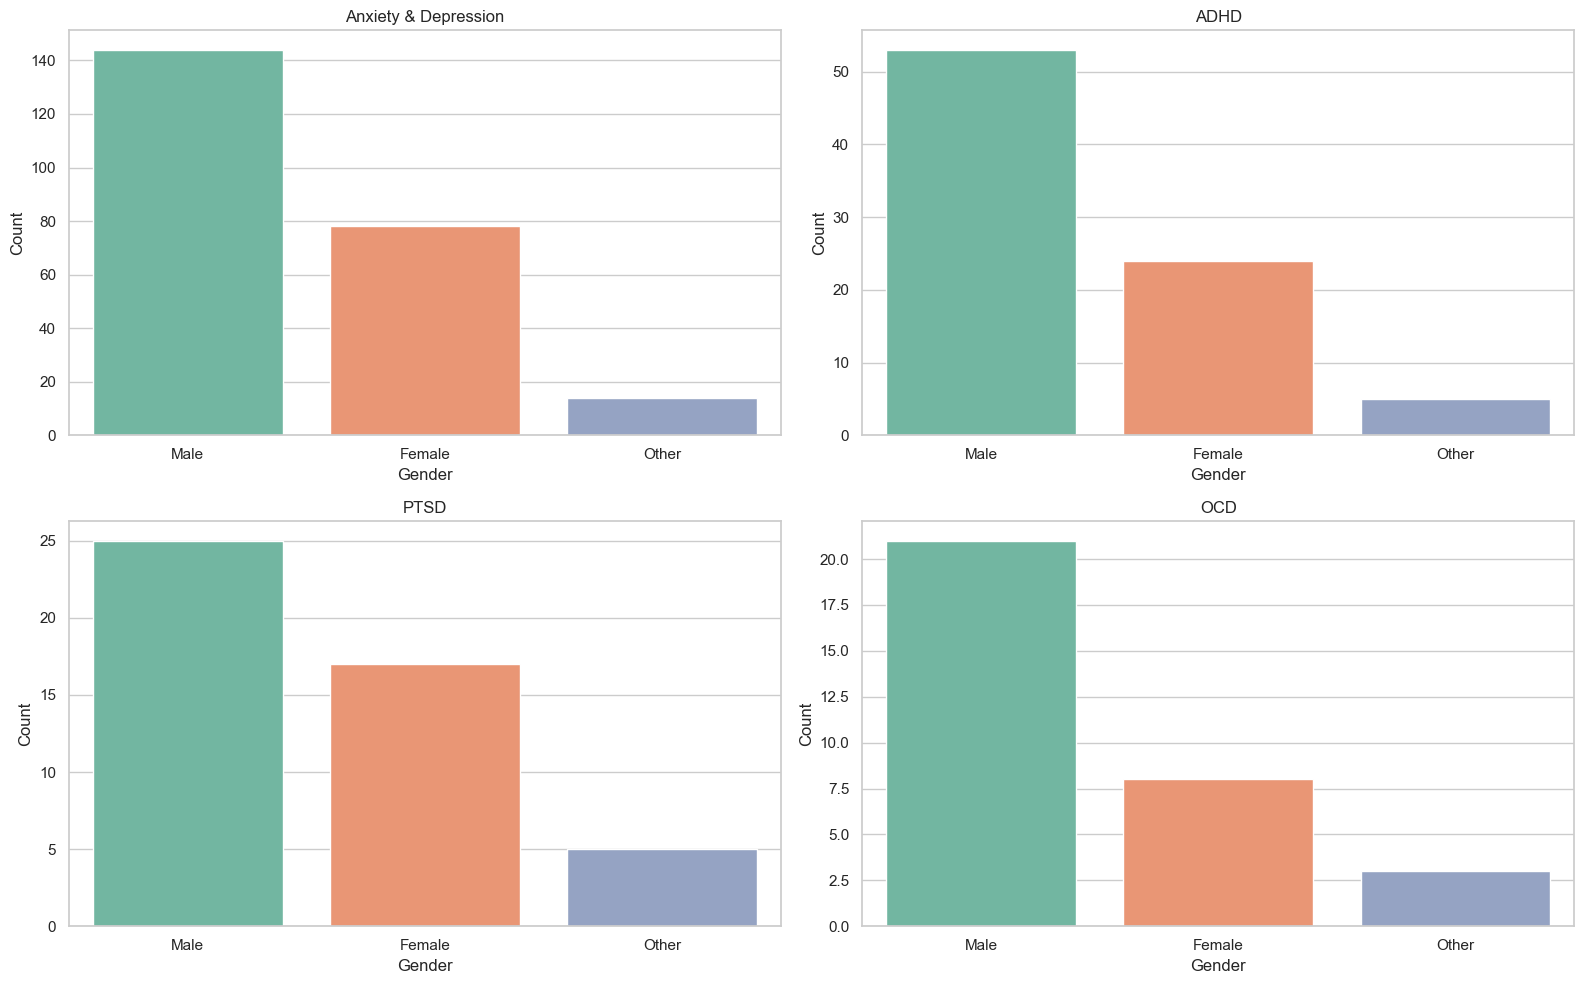

In [289]:
gender_order = ["Male", "Female", "Other"]

plt.figure(figsize=(16, 10))

# Set the style of the plots
sns.set(style="whitegrid")

# 1st countplot: Anxiety & Depression
plt.subplot(2, 2, 1)  # 2 rows, 2 columns, 1st subplot
sns.countplot(x="What is your gender?", 
              data=df[df['If yes, what condition(s) have you been diagnosed with?'].str.contains('Anxiety Disorder')],
              palette="Set2",
              order=gender_order)
plt.title("Anxiety & Depression")
plt.xlabel("Gender")
plt.ylabel("Count")

# 2nd countplot: ADHD
plt.subplot(2, 2, 2)  # 2 rows, 2 columns, 2nd subplot
sns.countplot(x="What is your gender?", 
              data=df[df['If yes, what condition(s) have you been diagnosed with?'].str.contains('Attention')],
              palette="Set2",
              order=gender_order)
plt.title("ADHD")
plt.xlabel("Gender")
plt.ylabel("Count")

# 3rd countplot: PTSD
plt.subplot(2, 2, 3)  # 2 rows, 2 columns, 3rd subplot
sns.countplot(x="What is your gender?", 
              data=df[df['If yes, what condition(s) have you been diagnosed with?'].str.contains('Post')],
              palette="Set2",
              order=gender_order)
plt.title("PTSD")
plt.xlabel("Gender")
plt.ylabel("Count")

# 4th countplot: OCD
plt.subplot(2, 2, 4)  # 2 rows, 2 columns, 4th subplot
sns.countplot(x="What is your gender?", 
              data=df[df['If yes, what condition(s) have you been diagnosed with?'].str.contains('Compulsive')],
              palette="Set2",
              order=gender_order)
plt.title("OCD")
plt.xlabel("Gender")
plt.ylabel("Count")

# Adjust the layout so plots don't overlap
plt.tight_layout()

# Show the plot
plt.show()



### Mental Disorder and Company Size

C:\Users\filip\AppData\Local\Temp\ipykernel_16720\1130341164.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, x="How many employees does your company or organization have?", palette="Set2", order=company_order)


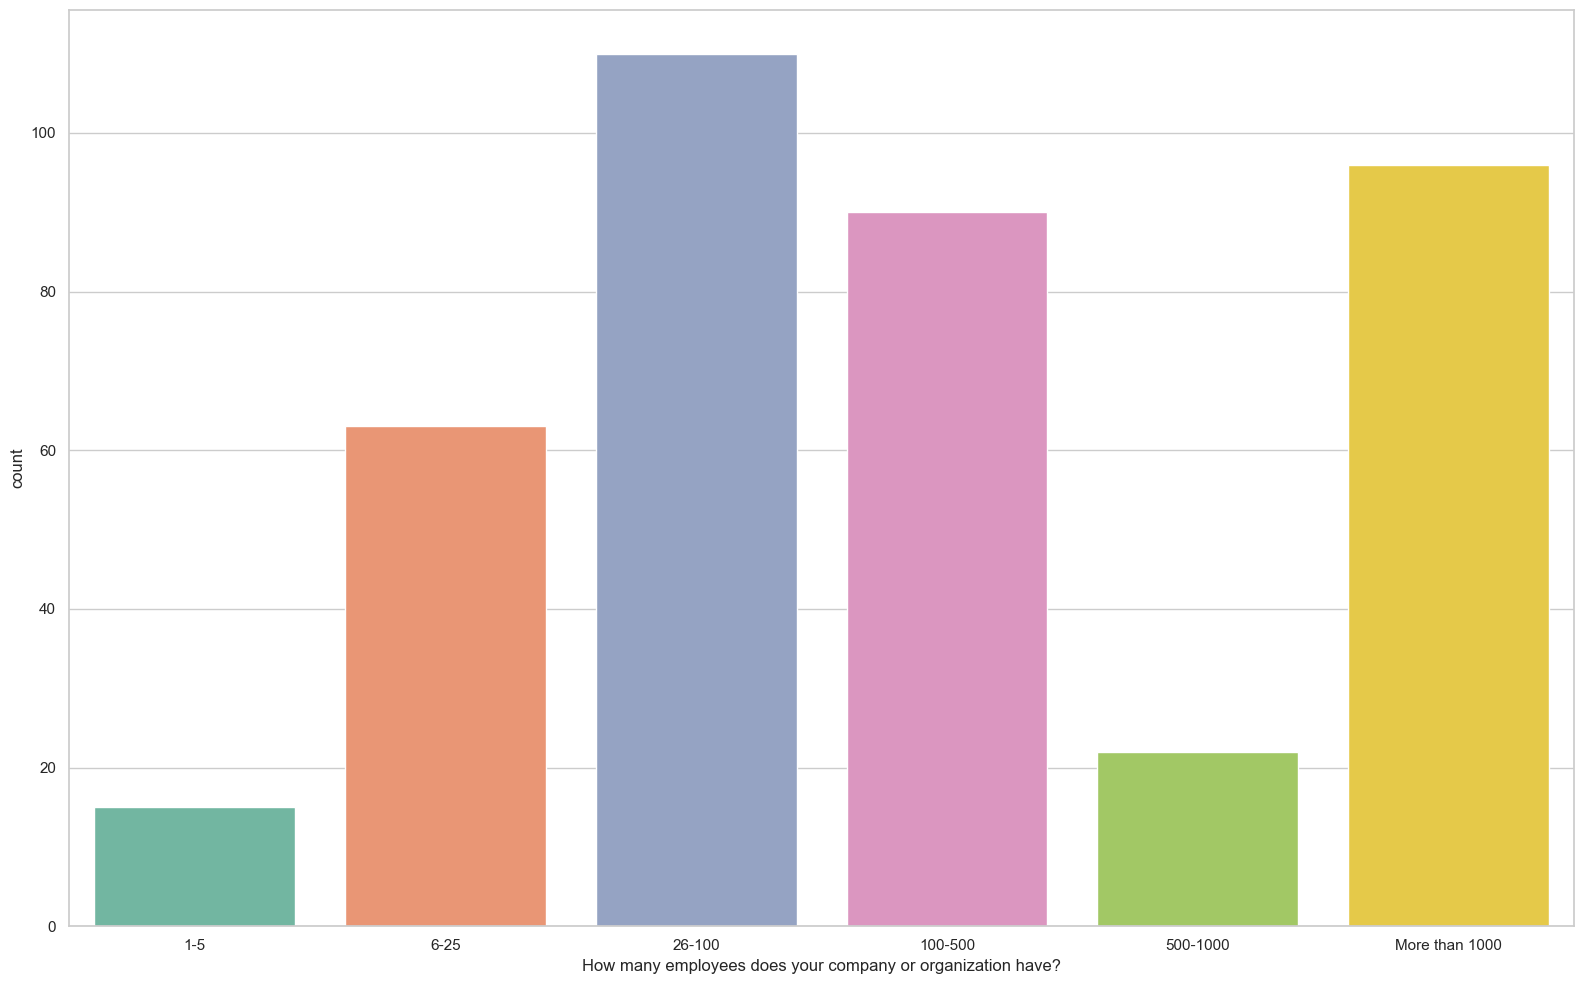

In [4]:
filtered_df = df[df["Do you currently have a mental health disorder?"] == "Yes"]

# Create the countplot
plt.figure(figsize=(16, 10))
sns.countplot(data=filtered_df, x="How many employees does your company or organization have?", palette="Set2", order=company_order)

# Display the plot
plt.tight_layout()  # Ensures there's no overlap in the layout
plt.show()

C:\Users\filip\AppData\Local\Temp\ipykernel_12868\2907307099.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="How many employees does your company or organization have?",
C:\Users\filip\AppData\Local\Temp\ipykernel_12868\2907307099.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="How many employees does your company or organization have?",
C:\Users\filip\AppData\Local\Temp\ipykernel_12868\2907307099.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="How many employees does your company or organization have?",
C:\User

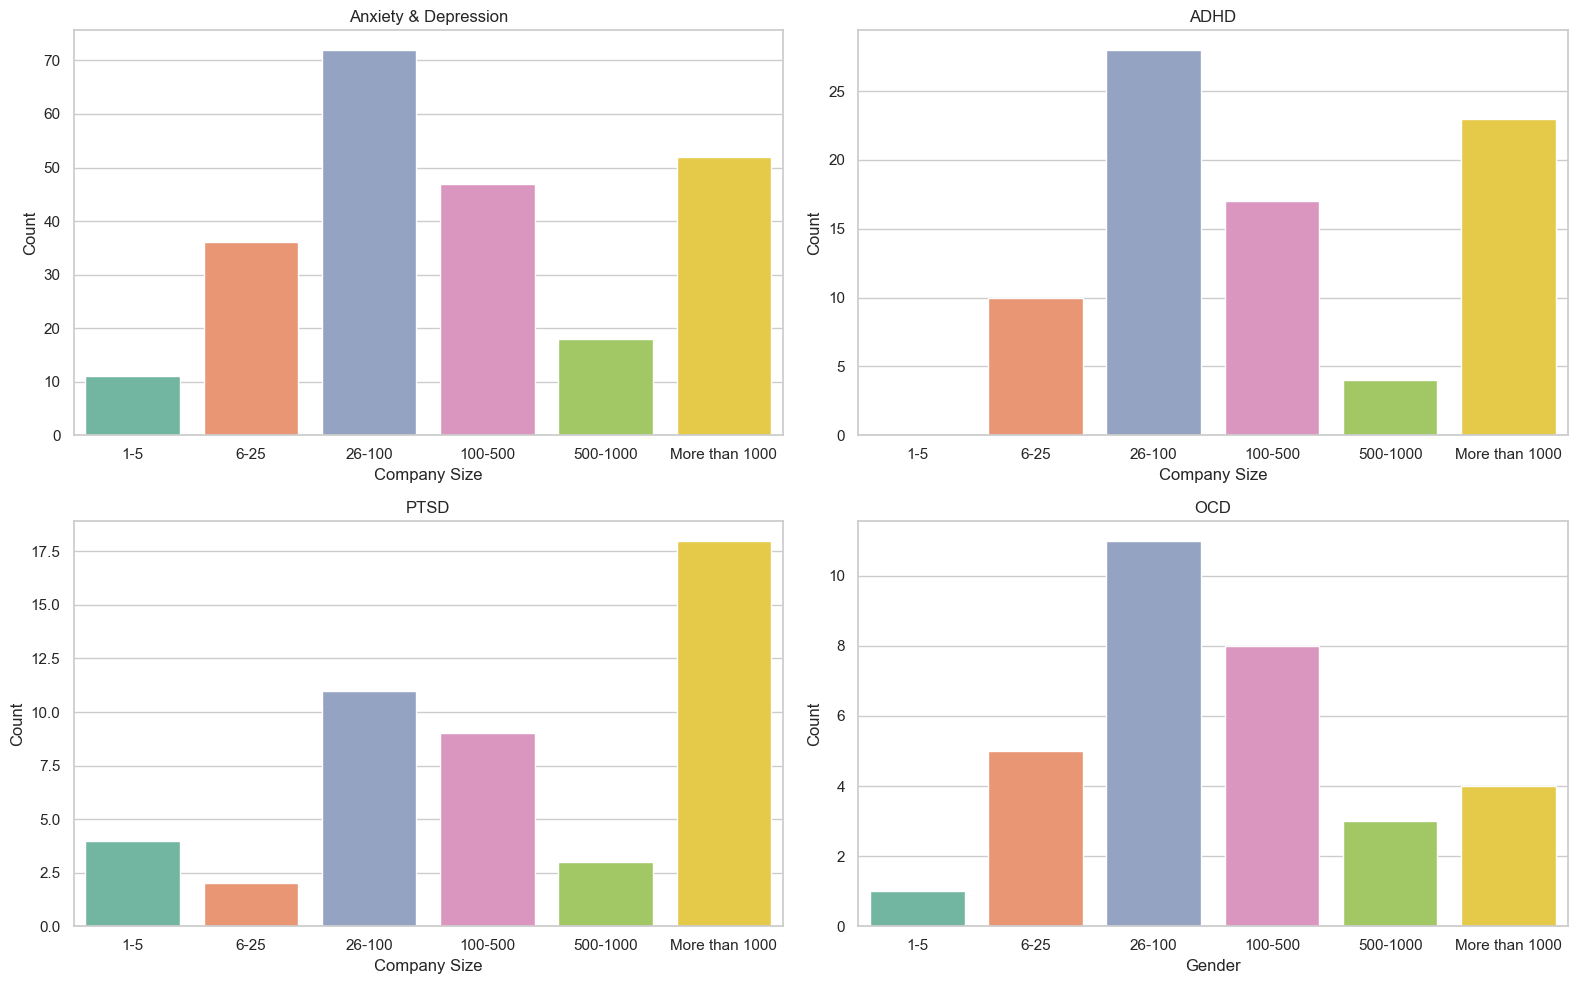

In [11]:
company_order = ["1-5", "6-25", "26-100", "100-500", "500-1000", "More than 1000"]

plt.figure(figsize=(16, 10))


sns.set(style="whitegrid")

# 1st countplot: Anxiety & Depression
plt.subplot(2, 2, 1)  # 2 rows, 2 columns, 1st subplot
sns.countplot(x="How many employees does your company or organization have?", 
              data=df[df['If yes, what condition(s) have you been diagnosed with?'].str.contains('Anxiety Disorder')],
              palette="Set2",
              order=company_order)
plt.title("Anxiety & Depression")
plt.xlabel("Company Size")
plt.ylabel("Count")

# 2nd countplot: ADHD
plt.subplot(2, 2, 2)  # 2 rows, 2 columns, 2nd subplot
sns.countplot(x="How many employees does your company or organization have?", 
              data=df[df['If yes, what condition(s) have you been diagnosed with?'].str.contains('Attention')],
              palette="Set2",
              order=company_order)
plt.title("ADHD")
plt.xlabel("Company Size")
plt.ylabel("Count")

# 3rd countplot: PTSD
plt.subplot(2, 2, 3)  # 2 rows, 2 columns, 3rd subplot
sns.countplot(x="How many employees does your company or organization have?", 
              data=df[df['If yes, what condition(s) have you been diagnosed with?'].str.contains('Post')],
              palette="Set2",
              order=company_order)
plt.title("PTSD")
plt.xlabel("Company Size")
plt.ylabel("Count")

# 4th countplot: OCD
plt.subplot(2, 2, 4)  # 2 rows, 2 columns, 4th subplot
sns.countplot(x="How many employees does your company or organization have?", 
              data=df[df['If yes, what condition(s) have you been diagnosed with?'].str.contains('Compulsive')],
              palette="Set2",
              order=company_order)
plt.title("OCD")
plt.xlabel("Gender")
plt.ylabel("Count")

# Adjust the layout so plots don't overlap
plt.tight_layout()

# Show the plot
plt.show()

### Mental Health Coverage

C:\Users\filip\AppData\Local\Temp\ipykernel_19364\3328953581.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Does your employer provide mental health benefits as part of healthcare coverage?",
C:\Users\filip\AppData\Local\Temp\ipykernel_19364\3328953581.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Does your employer provide mental health benefits as part of healthcare coverage?",
C:\Users\filip\AppData\Local\Temp\ipykernel_19364\3328953581.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Does your employer pro

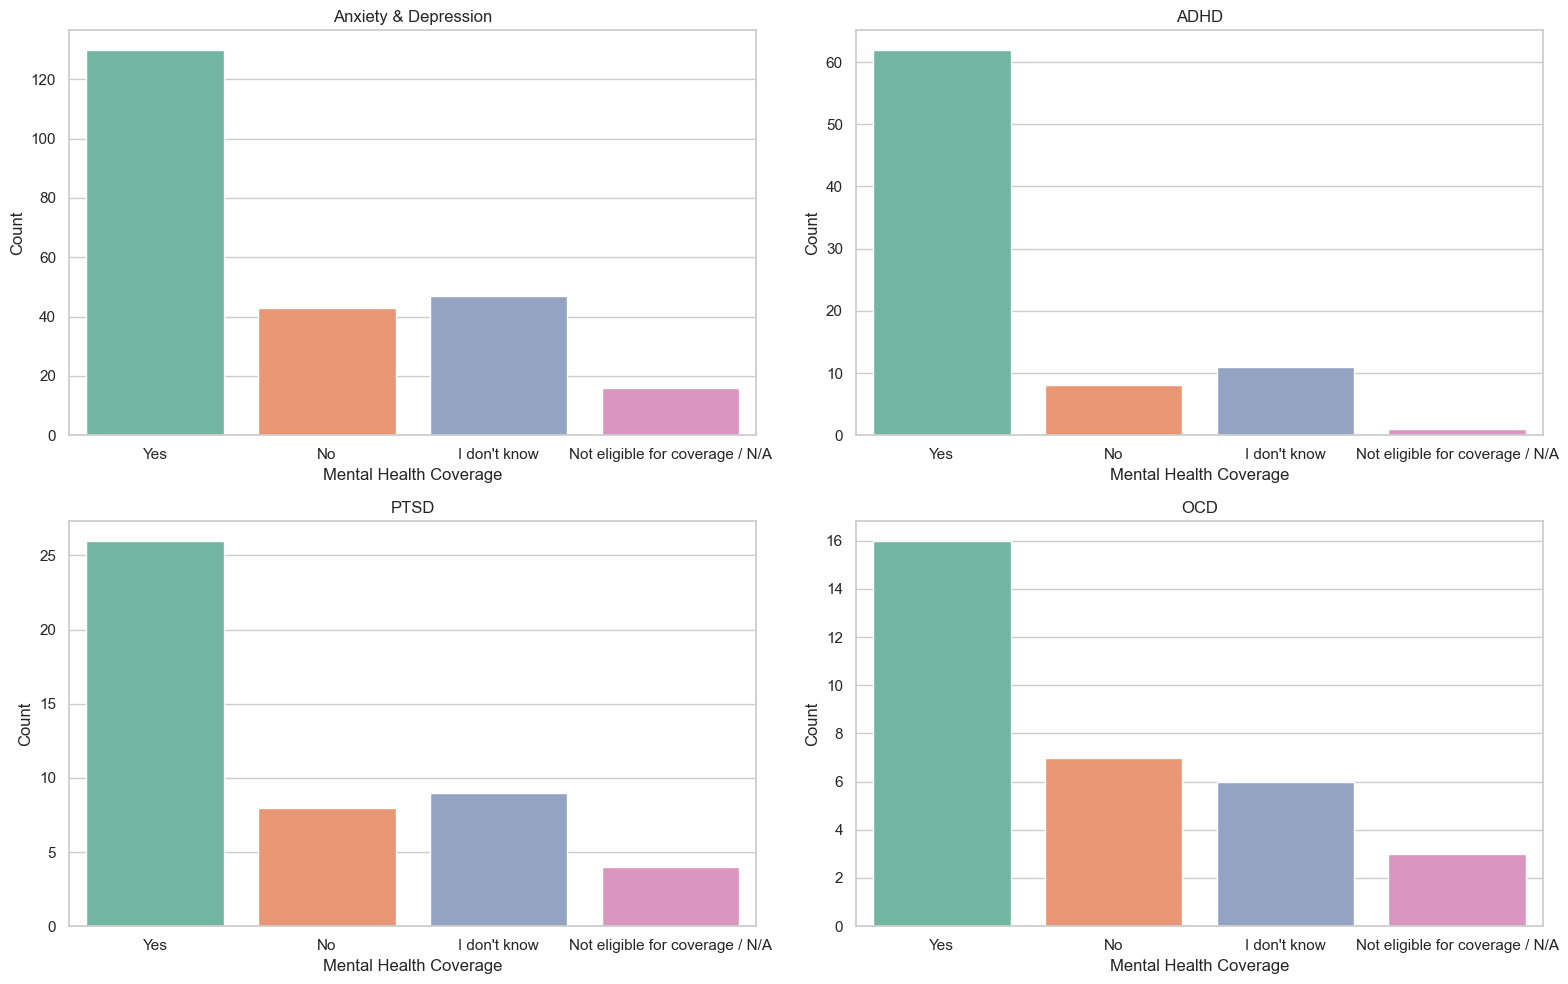

In [306]:
coverage_order = ["Yes", "No", "I don't know", "Not eligible for coverage / N/A"]

plt.figure(figsize=(16, 10))


sns.set(style="whitegrid")

# 1st countplot: Anxiety & Depression
plt.subplot(2, 2, 1)  # 2 rows, 2 columns, 1st subplot
sns.countplot(x="Does your employer provide mental health benefits as part of healthcare coverage?", 
              data=df[df['If yes, what condition(s) have you been diagnosed with?'].str.contains('Anxiety Disorder')],
              palette="Set2",
              order=coverage_order)
plt.title("Anxiety & Depression")
plt.xlabel("Mental Health Coverage")
plt.ylabel("Count")

# 2nd countplot: ADHD
plt.subplot(2, 2, 2)  # 2 rows, 2 columns, 2nd subplot
sns.countplot(x="Does your employer provide mental health benefits as part of healthcare coverage?", 
              data=df[df['If yes, what condition(s) have you been diagnosed with?'].str.contains('Attention')],
              palette="Set2",
              order=coverage_order)
plt.title("ADHD")
plt.xlabel("Mental Health Coverage")
plt.ylabel("Count")

# 3rd countplot: PTSD
plt.subplot(2, 2, 3)  # 2 rows, 2 columns, 3rd subplot
sns.countplot(x="Does your employer provide mental health benefits as part of healthcare coverage?", 
              data=df[df['If yes, what condition(s) have you been diagnosed with?'].str.contains('Post')],
              palette="Set2",
              order=coverage_order)
plt.title("PTSD")
plt.xlabel("Mental Health Coverage")
plt.ylabel("Count")

# 4th countplot: OCD
plt.subplot(2, 2, 4)  # 2 rows, 2 columns, 4th subplot
sns.countplot(x="Does your employer provide mental health benefits as part of healthcare coverage?", 
              data=df[df['If yes, what condition(s) have you been diagnosed with?'].str.contains('Compulsive')],
              palette="Set2",
              order=coverage_order)
plt.title("OCD")
plt.xlabel("Mental Health Coverage")
plt.ylabel("Count")

# Adjust the layout so plots don't overlap
plt.tight_layout()

# Show the plot
plt.show()

### Discussing your Mental Health Disorder with colleagues

C:\Users\filip\AppData\Local\Temp\ipykernel_19364\767950909.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Would you feel comfortable discussing a mental health disorder with your coworkers?",
C:\Users\filip\AppData\Local\Temp\ipykernel_19364\767950909.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Would you feel comfortable discussing a mental health disorder with your coworkers?",
C:\Users\filip\AppData\Local\Temp\ipykernel_19364\767950909.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Would you feel comfor

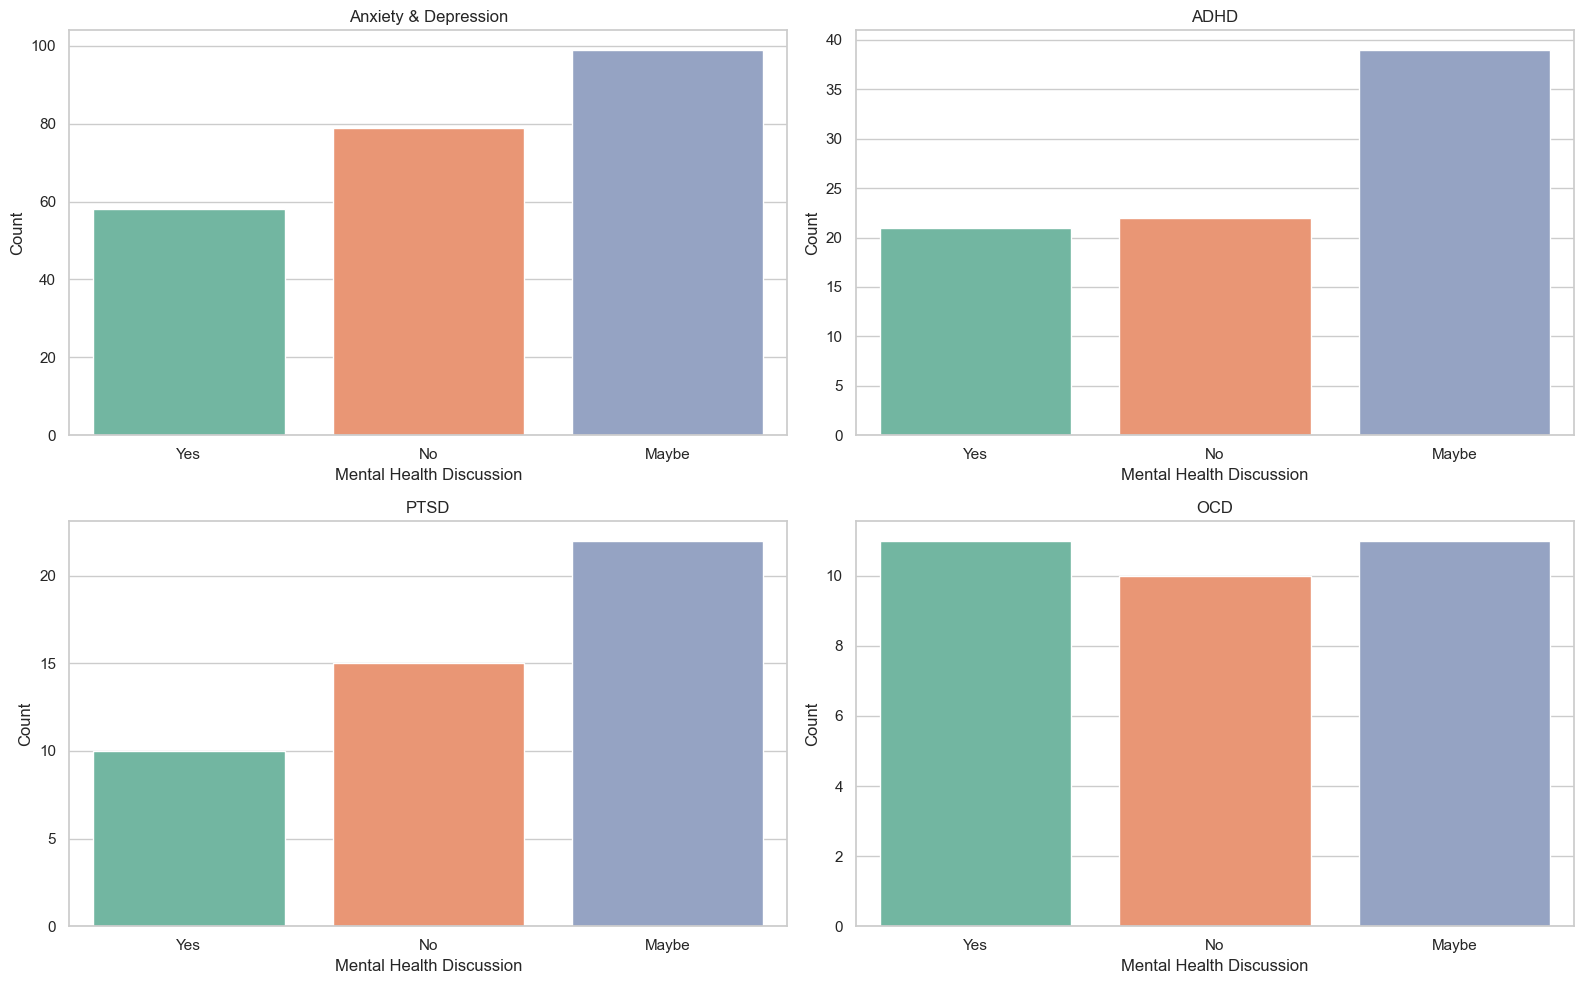

In [307]:
discussing_order = ["Yes", "No", "Maybe"]

plt.figure(figsize=(16, 10))


sns.set(style="whitegrid")

# 1st countplot: Anxiety & Depression
plt.subplot(2, 2, 1)  # 2 rows, 2 columns, 1st subplot
sns.countplot(x="Would you feel comfortable discussing a mental health disorder with your coworkers?", 
              data=df[df['If yes, what condition(s) have you been diagnosed with?'].str.contains('Anxiety Disorder')],
              palette="Set2",
              order=discussing_order)
plt.title("Anxiety & Depression")
plt.xlabel("Mental Health Discussion")
plt.ylabel("Count")

# 2nd countplot: ADHD
plt.subplot(2, 2, 2)  # 2 rows, 2 columns, 2nd subplot
sns.countplot(x="Would you feel comfortable discussing a mental health disorder with your coworkers?", 
              data=df[df['If yes, what condition(s) have you been diagnosed with?'].str.contains('Attention')],
              palette="Set2",
              order=discussing_order)
plt.title("ADHD")
plt.xlabel("Mental Health Discussion")
plt.ylabel("Count")

# 3rd countplot: PTSD
plt.subplot(2, 2, 3)  # 2 rows, 2 columns, 3rd subplot
sns.countplot(x="Would you feel comfortable discussing a mental health disorder with your coworkers?", 
              data=df[df['If yes, what condition(s) have you been diagnosed with?'].str.contains('Post')],
              palette="Set2",
              order=discussing_order)
plt.title("PTSD")
plt.xlabel("Mental Health Discussion")
plt.ylabel("Count")

# 4th countplot: OCD
plt.subplot(2, 2, 4)  # 2 rows, 2 columns, 4th subplot
sns.countplot(x="Would you feel comfortable discussing a mental health disorder with your coworkers?", 
              data=df[df['If yes, what condition(s) have you been diagnosed with?'].str.contains('Compulsive')],
              palette="Set2",
              order=discussing_order)
plt.title("OCD")
plt.xlabel("Mental Health Discussion")
plt.ylabel("Count")

# Adjust the layout so plots don't overlap
plt.tight_layout()

# Show the plot
plt.show()

### Mental Health Benefits

C:\Users\filip\AppData\Local\Temp\ipykernel_19364\1143030684.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Have your previous employers provided mental health benefits?",
C:\Users\filip\AppData\Local\Temp\ipykernel_19364\1143030684.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Have your previous employers provided mental health benefits?",
C:\Users\filip\AppData\Local\Temp\ipykernel_19364\1143030684.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Have your previous employers provided mental health benefits?"

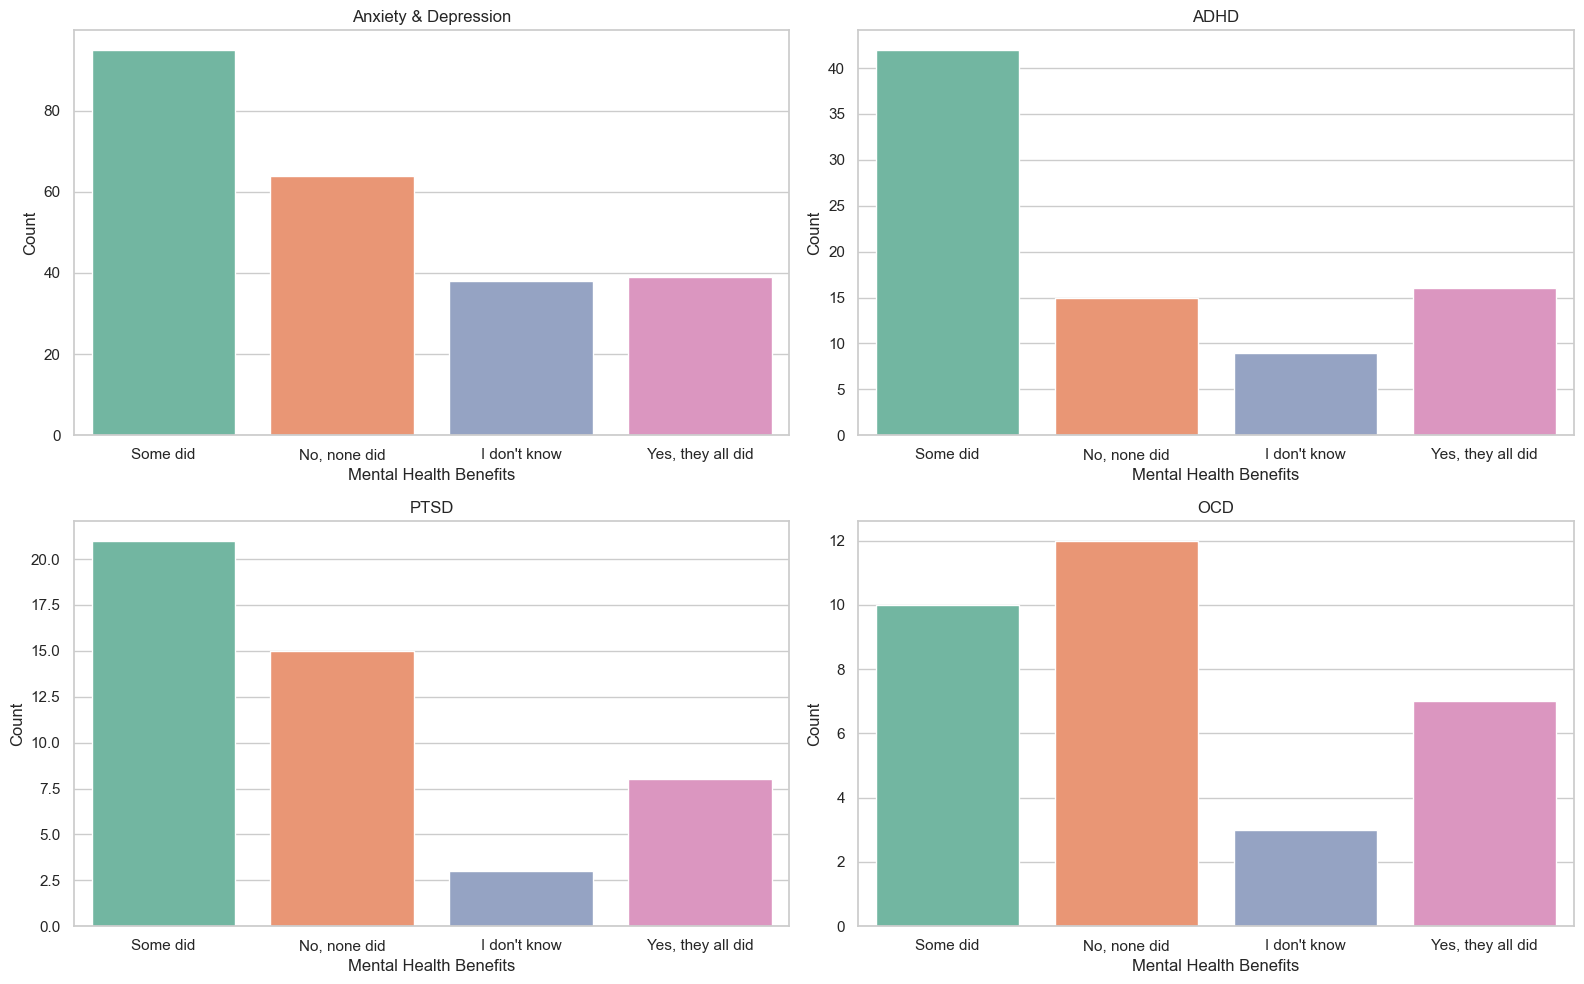

In [308]:
benefits_order = ["Some did", "No, none did", "I don't know", "Yes, they all did"]

plt.figure(figsize=(16, 10))


sns.set(style="whitegrid")

# 1st countplot: Anxiety & Depression
plt.subplot(2, 2, 1)  # 2 rows, 2 columns, 1st subplot
sns.countplot(x="Have your previous employers provided mental health benefits?", 
              data=df[df['If yes, what condition(s) have you been diagnosed with?'].str.contains('Anxiety Disorder')],
              palette="Set2",
              order=benefits_order)
plt.title("Anxiety & Depression")
plt.xlabel("Mental Health Benefits")
plt.ylabel("Count")

# 2nd countplot: ADHD
plt.subplot(2, 2, 2)  # 2 rows, 2 columns, 2nd subplot
sns.countplot(x="Have your previous employers provided mental health benefits?", 
              data=df[df['If yes, what condition(s) have you been diagnosed with?'].str.contains('Attention')],
              palette="Set2",
              order=benefits_order)
plt.title("ADHD")
plt.xlabel("Mental Health Benefits")
plt.ylabel("Count")

# 3rd countplot: PTSD
plt.subplot(2, 2, 3)  # 2 rows, 2 columns, 3rd subplot
sns.countplot(x="Have your previous employers provided mental health benefits?", 
              data=df[df['If yes, what condition(s) have you been diagnosed with?'].str.contains('Post')],
              palette="Set2",
              order=benefits_order)
plt.title("PTSD")
plt.xlabel("Mental Health Benefits")
plt.ylabel("Count")

# 4th countplot: OCD
plt.subplot(2, 2, 4)  # 2 rows, 2 columns, 4th subplot
sns.countplot(x="Have your previous employers provided mental health benefits?", 
              data=df[df['If yes, what condition(s) have you been diagnosed with?'].str.contains('Compulsive')],
              palette="Set2",
              order=benefits_order)
plt.title("OCD")
plt.xlabel("Mental Health Benefits")
plt.ylabel("Count")

# Adjust the layout so plots don't overlap
plt.tight_layout()

# Show the plot
plt.show()

### Family Background

C:\Users\filip\AppData\Local\Temp\ipykernel_19364\2784765193.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Do you have a family history of mental illness?",
C:\Users\filip\AppData\Local\Temp\ipykernel_19364\2784765193.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Do you have a family history of mental illness?",
C:\Users\filip\AppData\Local\Temp\ipykernel_19364\2784765193.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Do you have a family history of mental illness?",
C:\Users\filip\AppData\Local\Temp\ipyker

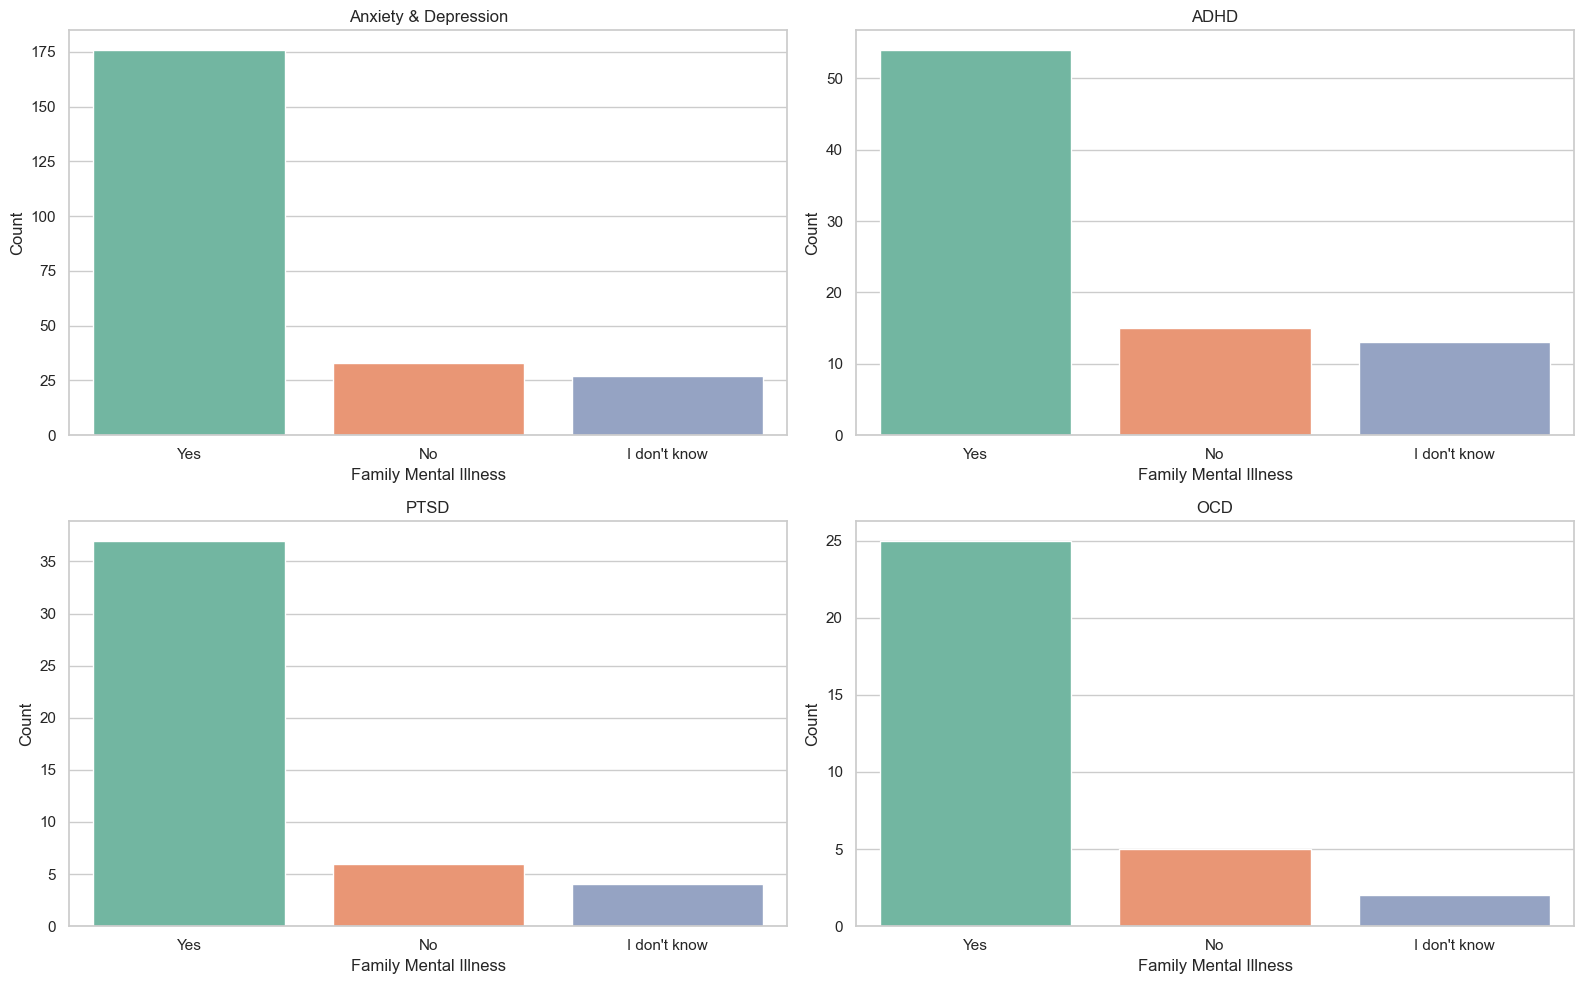

In [317]:
family_order = ["Yes", "No", "I don't know"]

plt.figure(figsize=(16, 10))


sns.set(style="whitegrid")

# 1st countplot: Anxiety & Depression
plt.subplot(2, 2, 1)  # 2 rows, 2 columns, 1st subplot
sns.countplot(x="Do you have a family history of mental illness?", 
              data=df[df['If yes, what condition(s) have you been diagnosed with?'].str.contains('Anxiety Disorder')],
              palette="Set2",
              order=family_order)
plt.title("Anxiety & Depression")
plt.xlabel("Family Mental Illness")
plt.ylabel("Count")

# 2nd countplot: ADHD
plt.subplot(2, 2, 2)  # 2 rows, 2 columns, 2nd subplot
sns.countplot(x="Do you have a family history of mental illness?", 
              data=df[df['If yes, what condition(s) have you been diagnosed with?'].str.contains('Attention')],
              palette="Set2",
              order=family_order)
plt.title("ADHD")
plt.xlabel("Family Mental Illness")
plt.ylabel("Count")

# 3rd countplot: PTSD
plt.subplot(2, 2, 3)  # 2 rows, 2 columns, 3rd subplot
sns.countplot(x="Do you have a family history of mental illness?", 
              data=df[df['If yes, what condition(s) have you been diagnosed with?'].str.contains('Post')],
              palette="Set2",
              order=family_order)
plt.title("PTSD")
plt.xlabel("Family Mental Illness")
plt.ylabel("Count")

# 4th countplot: OCD
plt.subplot(2, 2, 4)  # 2 rows, 2 columns, 4th subplot
sns.countplot(x="Do you have a family history of mental illness?", 
              data=df[df['If yes, what condition(s) have you been diagnosed with?'].str.contains('Compulsive')],
              palette="Set2",
              order=family_order)
plt.title("OCD")
plt.xlabel("Family Mental Illness")
plt.ylabel("Count")

# Adjust the layout so plots don't overlap
plt.tight_layout()

# Show the plot
plt.show()

### Carreer Development

In [313]:
df["Do you feel that being identified as a person with a mental health issue would hurt your career?"].value_counts()

Do you feel that being identified as a person with a mental health issue would hurt your career?
Maybe                         408
Yes, I think it would         370
No, I don't think it would     99
Yes, it has                    76
No, it has not                 23
Name: count, dtype: int64

C:\Users\filip\AppData\Local\Temp\ipykernel_19364\442813300.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Do you feel that being identified as a person with a mental health issue would hurt your career?",
C:\Users\filip\AppData\Local\Temp\ipykernel_19364\442813300.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Do you feel that being identified as a person with a mental health issue would hurt your career?",
C:\Users\filip\AppData\Local\Temp\ipykernel_19364\442813300.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplo

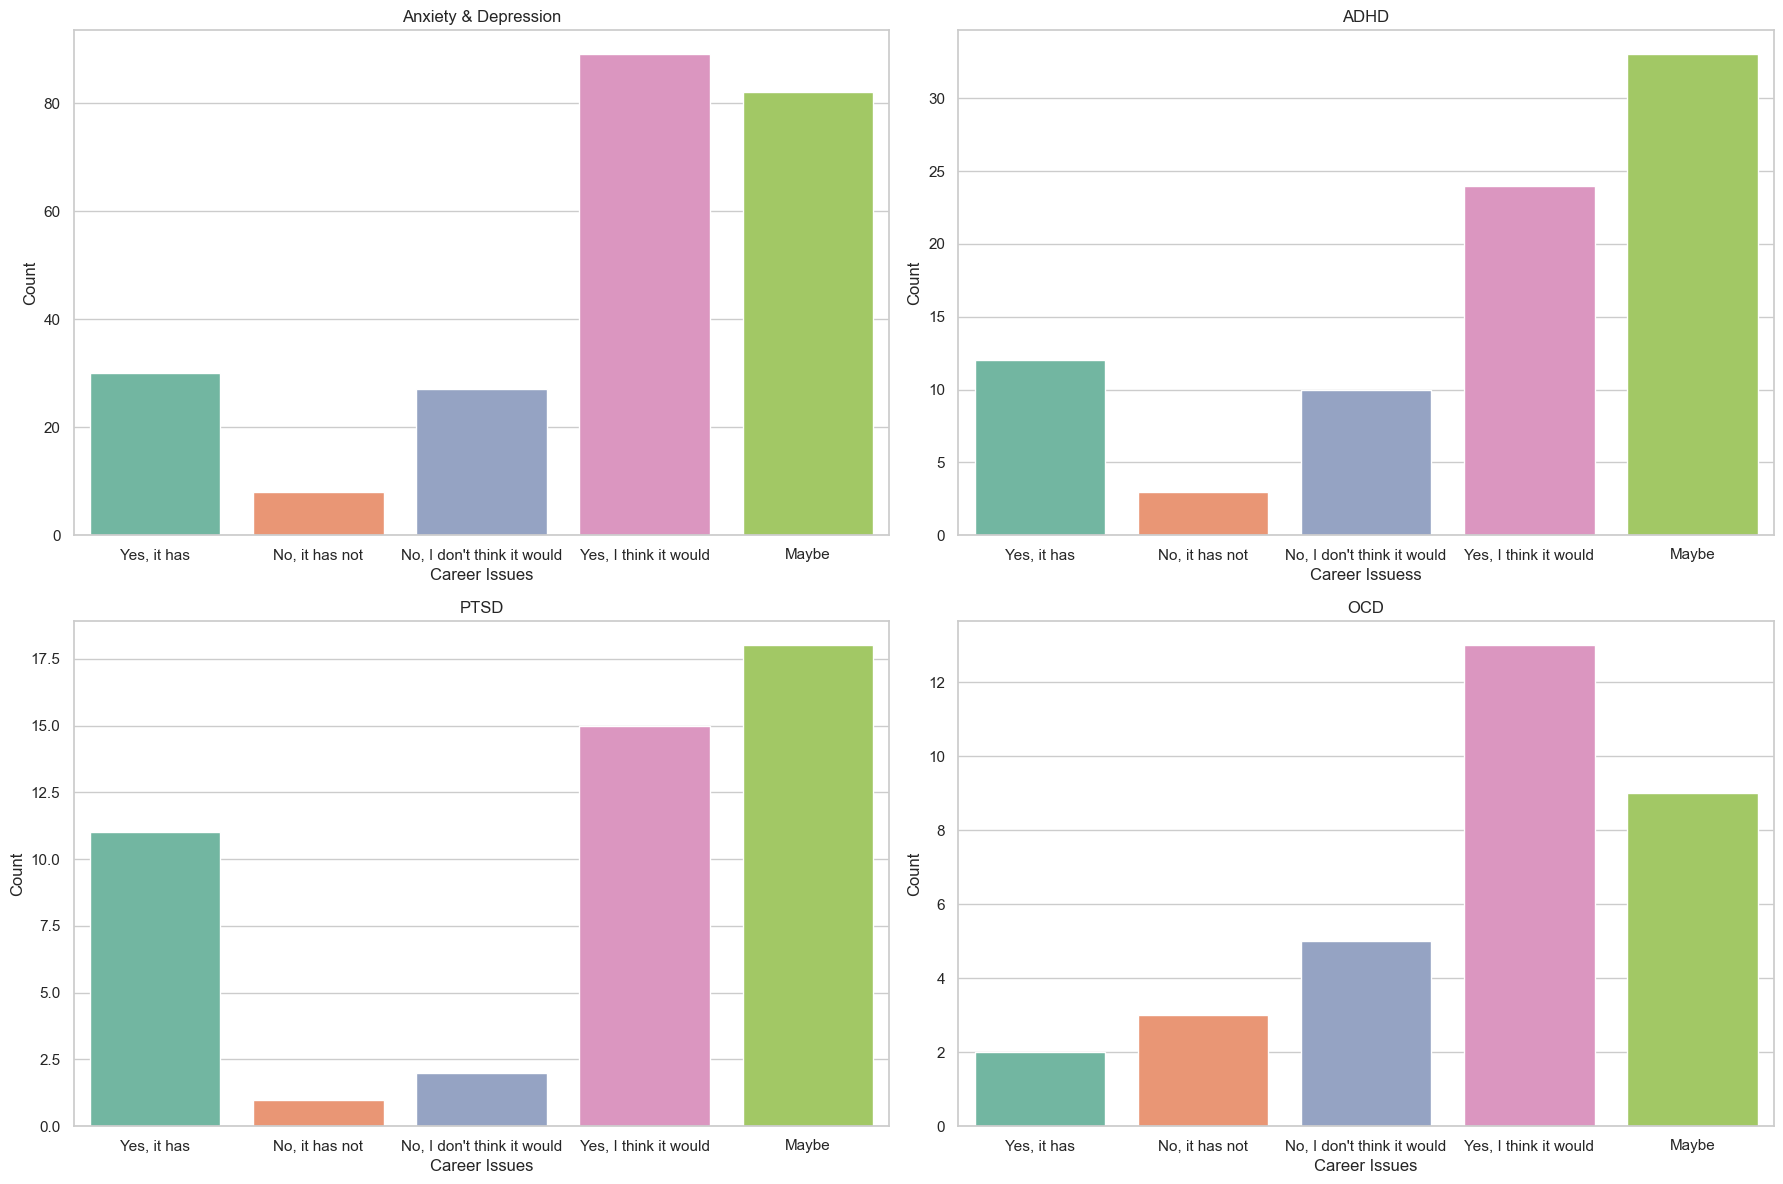

In [316]:
career_order = ["Yes, it has", "No, it has not",  "No, I don't think it would", "Yes, I think it would", "Maybe"]

plt.figure(figsize=(18, 12))


sns.set(style="whitegrid")

# 1st countplot: Anxiety & Depression
plt.subplot(2, 2, 1)  # 2 rows, 2 columns, 1st subplot
sns.countplot(x="Do you feel that being identified as a person with a mental health issue would hurt your career?", 
              data=df[df['If yes, what condition(s) have you been diagnosed with?'].str.contains('Anxiety Disorder')],
              palette="Set2",
              order=career_order)
plt.title("Anxiety & Depression")
plt.xlabel("Career Issues")
plt.ylabel("Count")

# 2nd countplot: ADHD
plt.subplot(2, 2, 2)  # 2 rows, 2 columns, 2nd subplot
sns.countplot(x="Do you feel that being identified as a person with a mental health issue would hurt your career?", 
              data=df[df['If yes, what condition(s) have you been diagnosed with?'].str.contains('Attention')],
              palette="Set2",
              order=career_order)
plt.title("ADHD")
plt.xlabel("Career Issuess")
plt.ylabel("Count")

# 3rd countplot: PTSD
plt.subplot(2, 2, 3)  # 2 rows, 2 columns, 3rd subplot
sns.countplot(x="Do you feel that being identified as a person with a mental health issue would hurt your career?", 
              data=df[df['If yes, what condition(s) have you been diagnosed with?'].str.contains('Post')],
              palette="Set2",
              order=career_order)
plt.title("PTSD")
plt.xlabel("Career Issues")
plt.ylabel("Count")

# 4th countplot: OCD
plt.subplot(2, 2, 4)  # 2 rows, 2 columns, 4th subplot
sns.countplot(x="Do you feel that being identified as a person with a mental health issue would hurt your career?", 
              data=df[df['If yes, what condition(s) have you been diagnosed with?'].str.contains('Compulsive')],
              palette="Set2",
              order=career_order)
plt.title("OCD")
plt.xlabel("Career Issues")
plt.ylabel("Count")

# Adjust the layout so plots don't overlap
plt.tight_layout()

# Show the plot
plt.show()

### Boxplots

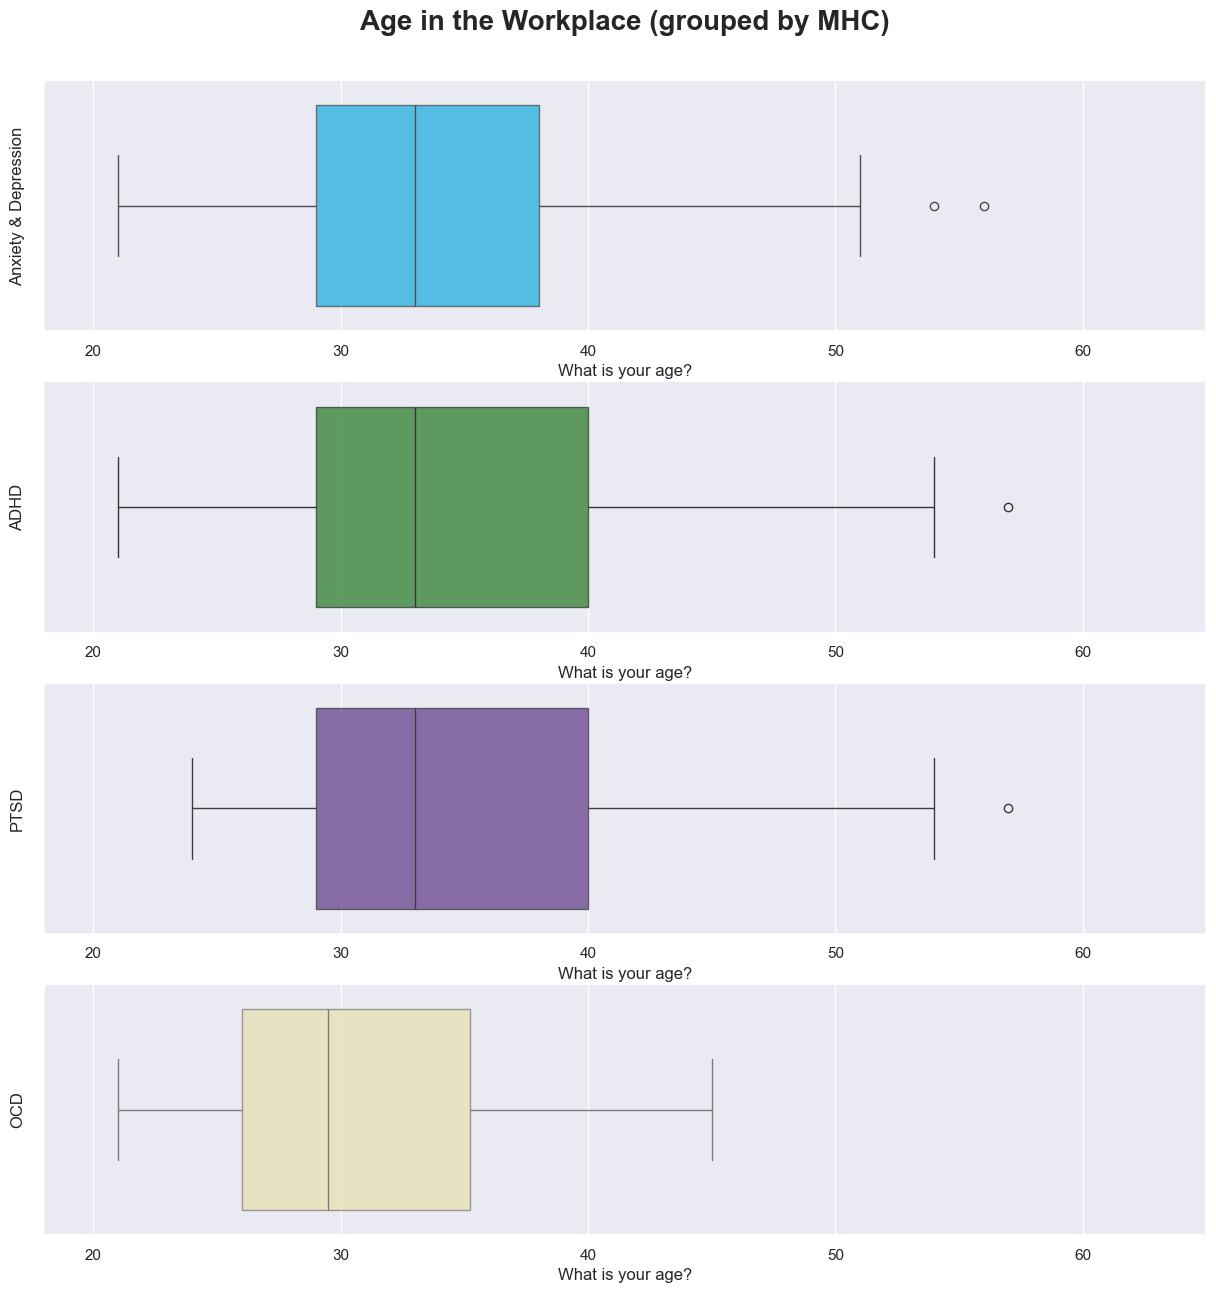

In [283]:
boxprops=dict(alpha=.75)
sns.set(style="darkgrid")

fig, axs = plt.subplots(4, 1, figsize=(15, 15))
(ax1, ax2, ax3, ax4) = axs


ax1 = sns.boxplot(data = df_anx_dep, x='What is your age?', color = 'deepskyblue', ax = axs[0], boxprops=boxprops)
ax1.set_xlim(18,65)
ax1.set(ylabel = 'Anxiety & Depression')

ax2 = sns.boxplot(data = df_adhd, x='What is your age?', color = 'forestgreen', ax = axs[1], boxprops=boxprops)
ax2.set_xlim(18,65)
ax2.set(ylabel = 'ADHD')

ax3 = sns.boxplot(data = df_ptsd, x='What is your age?', color = 'rebeccapurple', ax = axs[2], boxprops=boxprops)
ax3.set_xlim(18,65)
ax3.set(ylabel = 'PTSD')

ax4 = sns.boxplot(data = df_ocd, x='What is your age?', color = 'palegoldenrod', ax = axs[3], boxprops=boxprops)
ax4.set_xlim(18,65)
ax4.set(ylabel = 'OCD')

plt.text(.5, 1.2, 'Age in the Workplace (grouped by MHC)', weight = 'bold', horizontalalignment = 'center',
         fontsize = 20,transform = ax1.transAxes)
plt.show()

We can see from the boxplots, that Anxiety & Depression, ADHD and PTSD have more or less the same average age of affection, while OCD usually affects younger people. PTSD and ADHD are the most broadcasted ones, affecting a wider age range. In general we can say that Mental Health Disorders mainly affect young people. So prevention for this kind of target could be very useful. 

### WordCloud

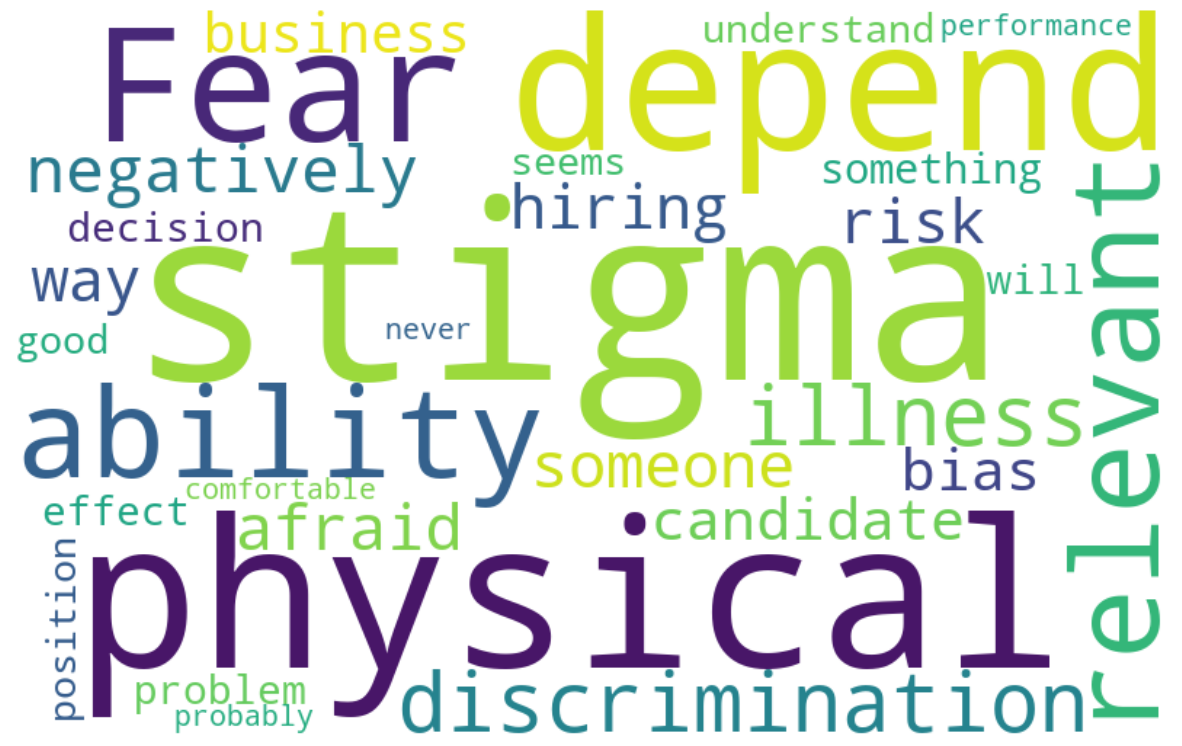

In [24]:
cleaned_answers2 = df[df["Why or why not?.1"]!="Not Applicable"]
text = " ".join(cleaned_answers2["Why or why not?.1"])

custom_stopwords = set(STOPWORDS)
custom_stopwords.update(["mental", "health", "might", "issue", "want", "affect", "getting", "reason", "negative", "think", "may", "feel", "impact", "time", "need", "one", "work","people", "job", "issues", "employer", "know", "interview",
                         "unless", "less", "potential", "hired", "see", "thing", "whether", "seem", "employers", "make", "still", "bring", "hire", "chance", "chances"])


wordcloud = WordCloud(width=800, height=500, background_color="white", max_words=30, stopwords=custom_stopwords).generate(text)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()


## Workplace conditions

In [6]:

workplace_conditions_df = [
    'How many employees does your company or organization have?',
    'Is your employer primarily a tech company/organization?',
    'Does your employer provide mental health benefits as part of healthcare coverage?',
    'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
    'Does your employer offer resources to learn more about mental health concerns and options for seeking help?',
    'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
    'Do you think that discussing a mental health disorder with your employer would have negative consequences?',
    'Would you feel comfortable discussing a mental health disorder with your coworkers?',
    'Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?',
    'Do you feel that your employer takes mental health as seriously as physical health?',
    "Have you had a mental health disorder in the past?"

]


# Target variable
target = "Do you currently have a mental health disorder?"

workplace_conditions = df[workplace_conditions_df]


### Histplots

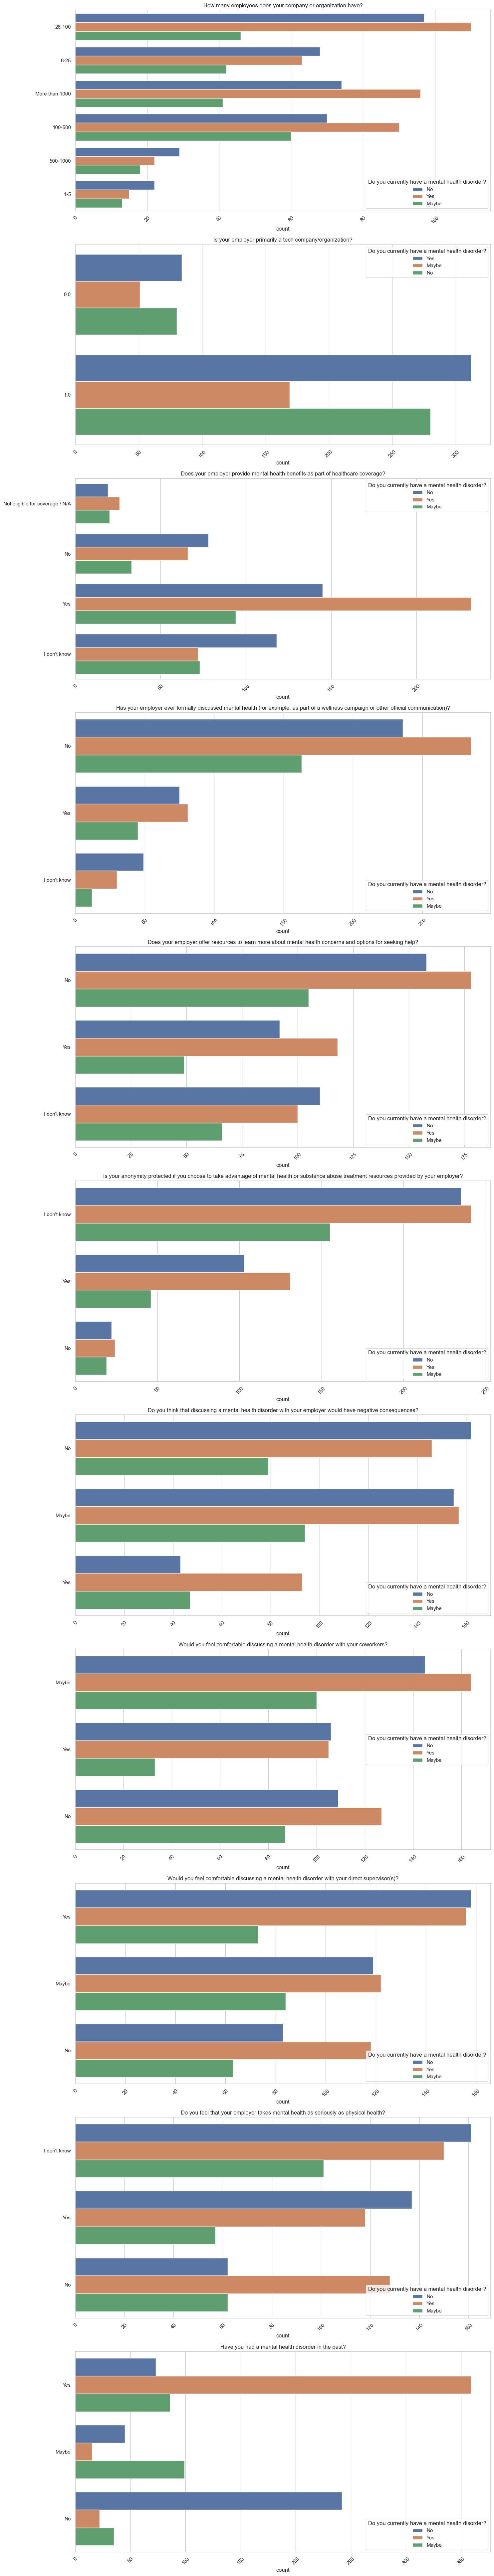

In [302]:
n_cols = 1   
n_rows = 12  

plt.figure(figsize=(n_cols*15, n_rows*7))  

for i, column in enumerate(workplace_conditions_df, 1):
    ax = plt.subplot(n_rows, n_cols, i)
    sns.countplot(data=df, y=column, hue=target, ax=ax)  
    plt.title(f"{column}")
    plt.xticks(rotation=45)
    ax.set_ylabel("")


plt.tight_layout() 
plt.show()


# Modeling

In [12]:
le = LabelEncoder()


df_encoding = ["Does your employer provide mental health benefits as part of healthcare coverage?",
    "Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",
    "Does your employer offer resources to learn more about mental health concerns and options for seeking help?",
    "Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?",
    "If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",
    "Do you think that discussing a mental health disorder with your employer would have negative consequences?",
    "Do you think that discussing a physical health issue with your employer would have negative consequences?",
    "Would you feel comfortable discussing a mental health disorder with your coworkers?",
    "Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?",
    "Do you feel that your employer takes mental health as seriously as physical health?",
    "Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?",
    "Have your previous employers provided mental health benefits?",
    "Were you aware of the options for mental health care provided by your previous employers?",
    "Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?",
    "Did your previous employers provide resources to learn more about mental health issues and how to seek help?",
    "Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?",
    "Do you think that discussing a mental health disorder with previous employers would have negative consequences?",
    "Do you think that discussing a physical health issue with previous employers would have negative consequences?",
    "Would you have been willing to discuss a mental health issue with your previous co-workers?",
    "Would you have been willing to discuss a mental health issue with your direct supervisor(s)?",
    "Did you feel that your previous employers took mental health as seriously as physical health?",
    "Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?",
    "Would you bring up a mental health issue with a potential employer in an interview?",
    "Do you feel that being identified as a person with a mental health issue would hurt your career?",
    "Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?",
    "Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?",
    "Do you have a family history of mental illness?",
    "What is your gender?",
    "Do you work remotely?",
    "Do you currently have a mental health disorder?",
    "Have you ever sought treatment for a mental health issue from a mental health professional?",
    "How many employees does your company or organization have?"]

df_encoded = df[df_encoding]

# Apply label encoding to ordinal variables
df_encoded['How many employees does your company or organization have?'] = le.fit_transform(df['How many employees does your company or organization have?'])
df_encoded["Do you currently have a mental health disorder?"] = df["Do you currently have a mental health disorder?"].replace({"No":0, "Yes":1, "Maybe":2})

# Apply one-hot encoding to nominal variables
df_encoded = pd.get_dummies(df_encoded, columns=[
    "Does your employer provide mental health benefits as part of healthcare coverage?",
    "Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",
    "Does your employer offer resources to learn more about mental health concerns and options for seeking help?",
    "Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?",
    "If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",
    "Do you think that discussing a mental health disorder with your employer would have negative consequences?",
    "Do you think that discussing a physical health issue with your employer would have negative consequences?",
    "Would you feel comfortable discussing a mental health disorder with your coworkers?",
    "Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?",
    "Do you feel that your employer takes mental health as seriously as physical health?",
    "Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?",
    "Have your previous employers provided mental health benefits?",
    "Were you aware of the options for mental health care provided by your previous employers?",
    "Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?",
    "Did your previous employers provide resources to learn more about mental health issues and how to seek help?",
    "Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?",
    "Do you think that discussing a mental health disorder with previous employers would have negative consequences?",
    "Do you think that discussing a physical health issue with previous employers would have negative consequences?",
    "Would you have been willing to discuss a mental health issue with your previous co-workers?",
    "Would you have been willing to discuss a mental health issue with your direct supervisor(s)?",
    "Did you feel that your previous employers took mental health as seriously as physical health?",
    "Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?",
    "Would you bring up a mental health issue with a potential employer in an interview?",
    "Do you feel that being identified as a person with a mental health issue would hurt your career?",
    "Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?",
    "Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?",
    "Do you have a family history of mental illness?",
    "What is your gender?",
    "Do you work remotely?",
    "Have you ever sought treatment for a mental health issue from a mental health professional?"
], drop_first=True)



C:\Users\filip\AppData\Local\Temp\ipykernel_6788\385958530.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded['How many employees does your company or organization have?'] = le.fit_transform(df['How many employees does your company or organization have?'])
C:\Users\filip\AppData\Local\Temp\ipykernel_6788\385958530.py:41: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded["Do you currently have a mental health disorder?"] = df["Do you currently have a mental health disorder?"].replace({"No":0, "Yes":1

### Random Forest

In [13]:
X = df_encoded.drop(columns=["Do you currently have a mental health disorder?"])
y = df_encoded["Do you currently have a mental health disorder?"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=53)

The selection of parameters has been done through manual selection. It has been also performed a hypertuning of parameters which result did not really contribute the accuracy reduction.

In [14]:
rf = RandomForestClassifier(n_estimators=200, max_depth=7, min_samples_leaf=5, min_samples_split=3, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, min_samples_leaf=5, min_samples_split=3,
                       n_estimators=200, random_state=42)

In [15]:
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.64
[[52 24  0]
 [10 74  0]
 [16 20  0]]
              precision    recall  f1-score   support

           0       0.67      0.68      0.68        76
           1       0.63      0.88      0.73        84
           2       0.00      0.00      0.00        36

    accuracy                           0.64       196
   macro avg       0.43      0.52      0.47       196
weighted avg       0.53      0.64      0.58       196



c:\Users\filip\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\filip\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\filip\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [16]:
y_train_pred = rf.predict(X_train)

# Step 3: Calculate accuracy on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)

print(f"Accuracy on training set: {train_accuracy:.2f}")

Accuracy on training set: 0.70


In [10]:
cv_scores = cross_val_score(rf, X_train, y_train, cv=20)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean():.2f}")

Cross-validation scores: [0.61538462 0.64102564 0.61538462 0.69230769 0.66666667 0.64102564
 0.61538462 0.58974359 0.66666667 0.69230769 0.58974359 0.56410256
 0.64102564 0.64102564 0.66666667 0.64102564 0.69230769 0.66666667
 0.61538462 0.66666667]
Mean cross-validation score: 0.64


In [50]:
cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm, index=["No", "Yes", "Maybe"], columns=["No", "Yes", "Maybe"])

# Plot the confusion matrix using Plotly
fig = px.imshow(cm_df, text_auto=True, color_continuous_scale="Blues")

# Update layout to make the background transparent
fig.update_layout(
    title="Confusion Matrix",
    xaxis_title="Predicted",
    yaxis_title="True",
    paper_bgcolor='rgba(0,0,0,0)',  # Transparent background
    plot_bgcolor='rgba(0,0,0,0)',   # Transparent plot area
    font=dict(color="white")  # Adjust font color if needed for better visibility
)

# Show the figure
fig.show()

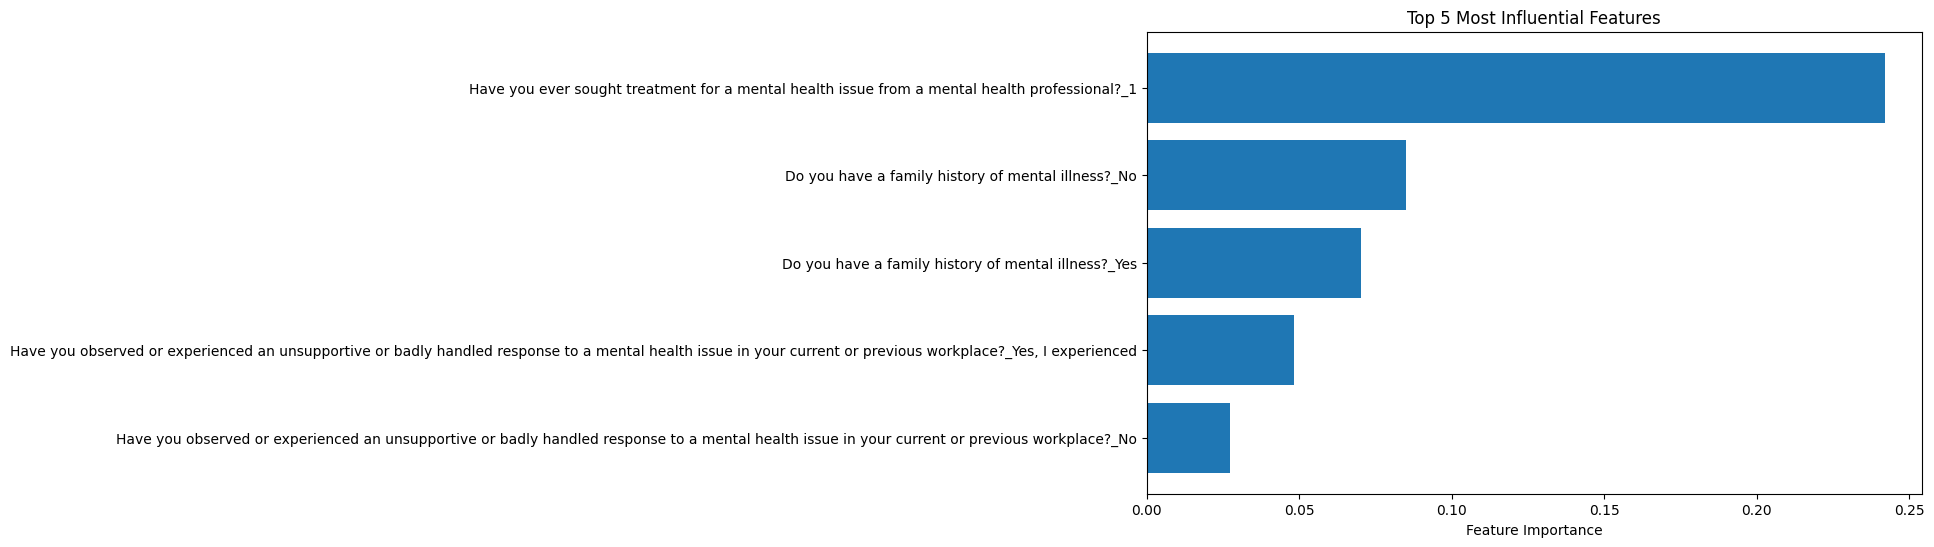

In [53]:
feature_importances = rf.feature_importances_

# Sort the feature importances in descending order and get the indices of the top 10
indices = np.argsort(feature_importances)[::-1][:5]

# Create a plot for the top 10 features
plt.figure(figsize=(10, 6))
plt.title("Top 5 Most Influential Features")

# Plot horizontal bar chart
plt.barh(range(5), feature_importances[indices], align='center')

# Add feature names as labels
plt.yticks(range(5), [X_train.columns[i] for i in indices])

plt.xlabel('Feature Importance')
plt.gca().invert_yaxis() 
plt.tight_layout
plt.show()

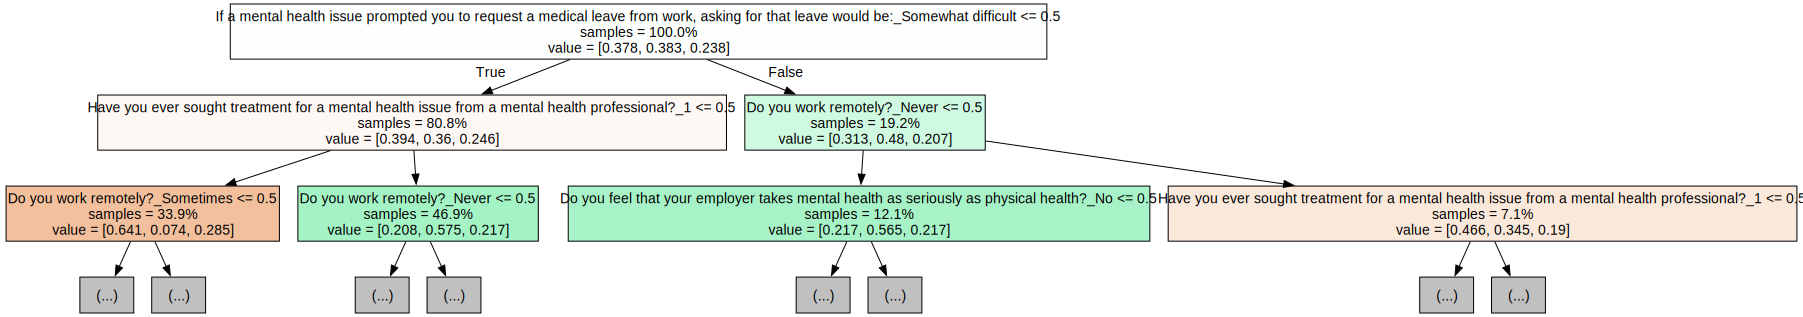

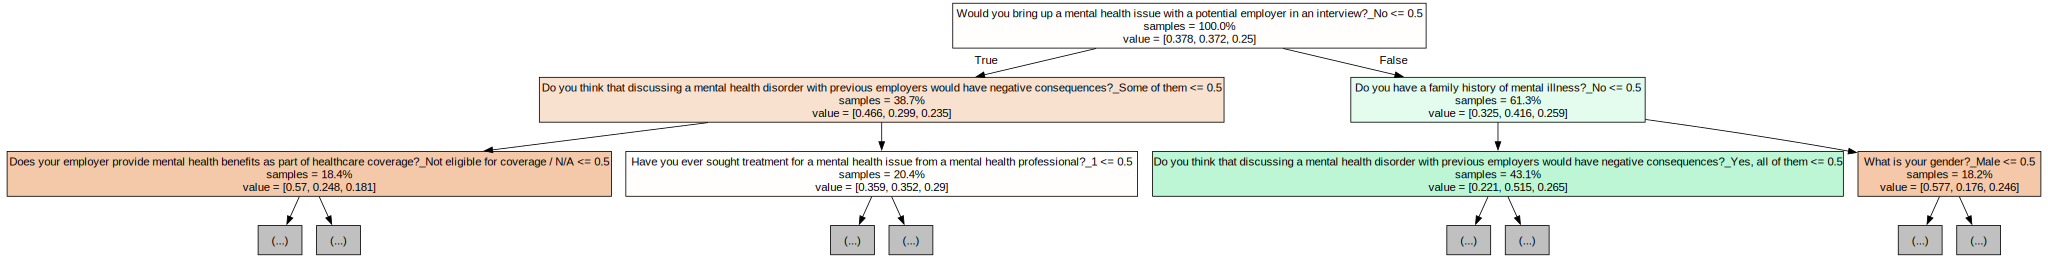

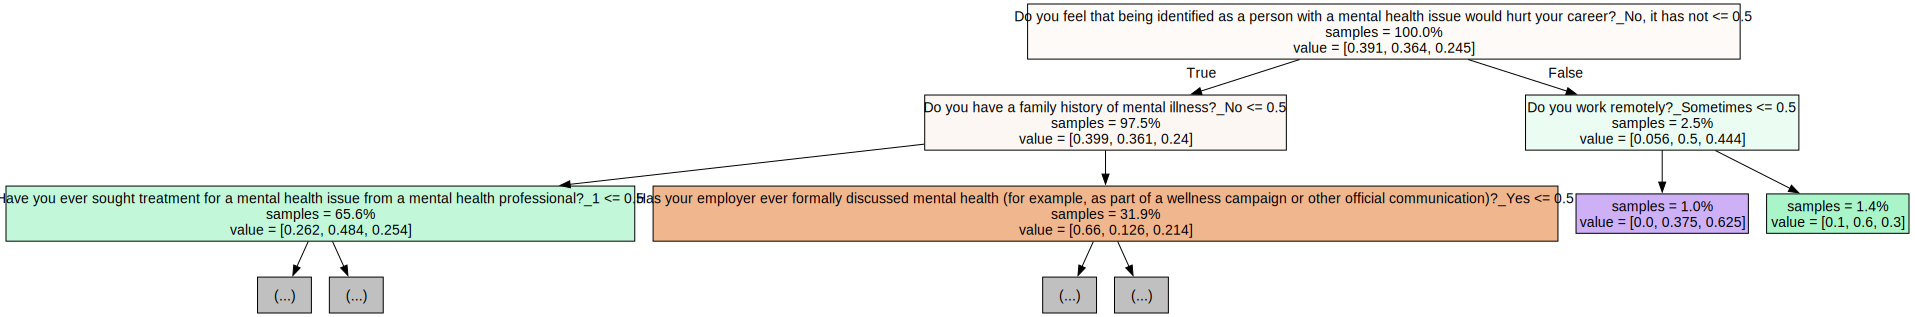

In [11]:
for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

### Logistic Regression

In [161]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [196]:
logreg = LogisticRegression(random_state=42, max_iter=1000, penalty="l2", C=1.5)
logreg.fit(X_train, y_train)


LogisticRegression(C=1.5, max_iter=1000, random_state=42)

In [197]:
y_pred = logreg.predict(X_test_scaled)

c:\Users\filip\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [198]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.53
Confusion Matrix:
[[58  5 13]
 [29 34 21]
 [20  5 11]]
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.76      0.63        76
           1       0.77      0.40      0.53        84
           2       0.24      0.31      0.27        36

    accuracy                           0.53       196
   macro avg       0.52      0.49      0.48       196
weighted avg       0.59      0.53      0.52       196



In [199]:
y_train_pred = logreg.predict(X_train)

# Step 3: Calculate accuracy on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)

print(f"Accuracy on training set: {train_accuracy:.2f}")

Accuracy on training set: 0.71


### GBM

In [191]:
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.001, max_depth=3, random_state=42)
gbm.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.001, random_state=42)

In [192]:
y_pred = gbm.predict(X_test_scaled)

c:\Users\filip\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [193]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.62
Confusion Matrix:
[[47 29  0]
 [10 74  0]
 [12 24  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.62      0.65        76
           1       0.58      0.88      0.70        84
           2       0.00      0.00      0.00        36

    accuracy                           0.62       196
   macro avg       0.42      0.50      0.45       196
weighted avg       0.51      0.62      0.55       196



c:\Users\filip\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\filip\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\filip\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [194]:
y_train_pred = gbm.predict(X_train)

# Step 3: Calculate accuracy on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)

print(f"Accuracy on training set: {train_accuracy:.2f}")

Accuracy on training set: 0.64


### Decision Tree

In [241]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [239]:
param_grid = {
    'max_depth': [3, 5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print(f'Best Parameters: {grid_search.best_params_}')

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best Parameters: {'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5}


In [242]:
y_pred = dt.predict(X_test_scaled)

c:\Users\filip\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [243]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.64
Confusion Matrix:
[[48 25  3]
 [10 74  0]
 [13 20  3]]
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.63      0.65        76
           1       0.62      0.88      0.73        84
           2       0.50      0.08      0.14        36

    accuracy                           0.64       196
   macro avg       0.60      0.53      0.51       196
weighted avg       0.62      0.64      0.59       196



In [244]:
y_train_pred = dt.predict(X_train)

# Step 3: Calculate accuracy on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)

print(f"Accuracy on training set: {train_accuracy:.2f}")

Accuracy on training set: 0.65


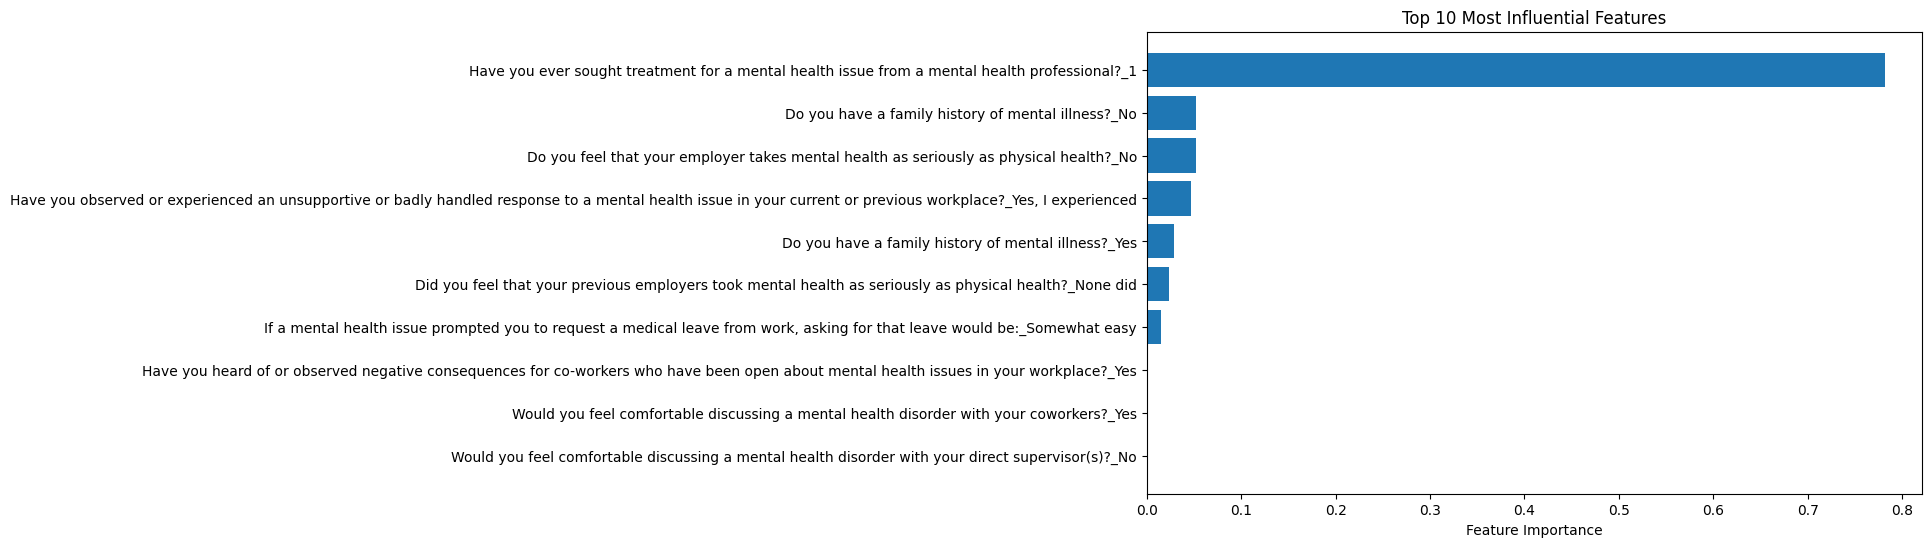

In [251]:
feature_importances = dt.feature_importances_

# Sort the feature importances in descending order and get the indices of the top 10
indices = np.argsort(feature_importances)[::-1][:10]

# Create a plot for the top 10 features
plt.figure(figsize=(10, 6))
plt.title("Top 10 Most Influential Features")

# Plot horizontal bar chart
plt.barh(range(10), feature_importances[indices], align='center')

# Add feature names as labels
plt.yticks(range(10), [X_train.columns[i] for i in indices])

plt.xlabel('Feature Importance')
plt.gca().invert_yaxis() 
plt.tight_layout
plt.show()